# 1. Importing Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/home/hunter/Desktop/stige/application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Basic Check

In [3]:
pd.DataFrame({"Rows":df.shape[0],"Columns":df.shape[1]},index = [1])

,Rows,Columns
1,307511,122


In [4]:
pd.DataFrame({"Column Name":df.columns})

,Column Name
0,SK_ID_CURR
1,TARGET
2,NAME_CONTRACT_TYPE
3,CODE_GENDER
4,FLAG_OWN_CAR
...,...
117,AMT_REQ_CREDIT_BUREAU_DAY
118,AMT_REQ_CREDIT_BUREAU_WEEK
119,AMT_REQ_CREDIT_BUREAU_MON
120,AMT_REQ_CREDIT_BUREAU_QRT


In [5]:
df['SK_ID_CURR'].nunique()

307511

There is a unique id for every request

# 2.1 Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
missing = df.isnull().sum()
missing = missing[missing>0]# Taking values where there are missing values
miss_per = round(missing/len(df),3)*100
pd.DataFrame({"Missing Entries":missing,"Missing Percentage":miss_per}).sort_values("Missing Percentage",ascending = False)

,Missing Entries,Missing Percentage
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
DAYS_LAST_PHONE_CHANGE,1,0.0
CNT_FAM_MEMBERS,2,0.0


There are 67 columns with missing values and in some columns its percentage is over 60

# 2.3 Descriptive Statistics

In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# 2.4 Outlier 

In [9]:
# #Outlier Treatment
# def outlier_detect(df):
#     for i in df.describe().columns:
#         Q1=df.describe().at['25%',i]
#         Q3=df.describe().at['75%',i]
#         IQR=Q3 - Q1
#         LTV=Q1 - 1.5 * IQR
#         UTV=Q3 + 1.5 * IQR
#         x=np.array(df[i])
#         p=[]
#         for j in x:
#             if j < LTV or j>UTV:
#                 p.append(df[i].median())
#             else:
#                 p.append(j)
#         df[i]=p
#     return df

In [10]:
# dat = outlier_detect(df)

# 3 Exploratory Data Analysis (EDA)

# 3.1 Categorical Variables

Start with categorical variable analysis as they give brief idea about the behaviour of data

##  3.1.1 Target

In [11]:
df['TARGET'].value_counts(dropna = False)

0    282686
1     24825
Name: TARGET, dtype: int64

/home/hunter/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of client in each difficulty category')

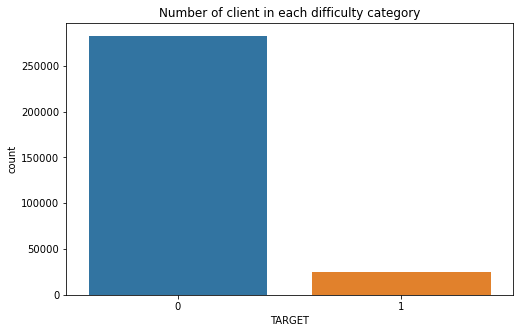

In [12]:
plt.figure(figsize = (8,5))
sns.countplot(df['TARGET'])
plt.title("Number of client in each difficulty category")

Here we could see that one category has a lot more data than other category which clearly shows there is a __Data Imbalance__.
- Dividing the data into 2 dataframe one where there is no payment difficulty and in other there is payment difficulty.

In [13]:
df0 = df.loc[df["TARGET"]==0,:]
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [14]:
df1 = df.loc[df["TARGET"]==1,:]
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def overalldata(dat,colname):
    plt.figure(figsize = (8,5))
    sns.countplot(x=colname,data = dat)
    print(dat[colname].value_counts(dropna = False))

In [16]:
def paymentdifficulty(dat1,colname):
    plt.figure(figsize = (8,5))
    sns.countplot(x=colname,data = dat1)
    print(dat1[colname].value_counts(dropna = False))

## 3.1.2 NAME_CONTRACT_TYPE

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


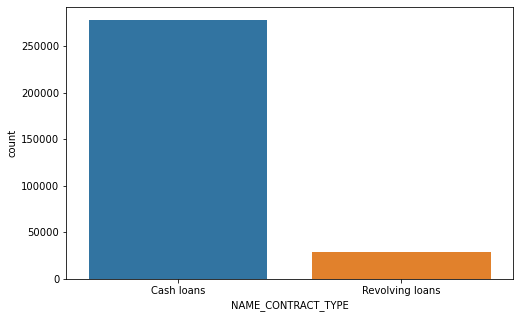

In [17]:
overalldata(df,"NAME_CONTRACT_TYPE")

- Its clearly seen that mostly Cash loan is prominent.
- Let's see its association with __TARGET__

- __No payment Difficulty__

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

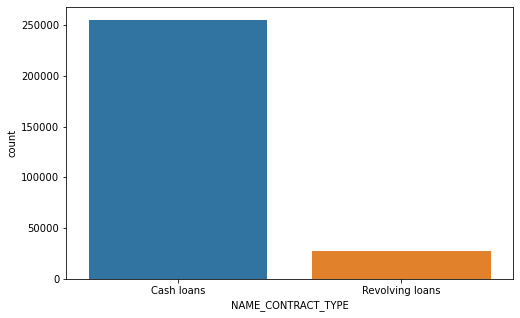

In [18]:
plt.figure(figsize = (8,5))
sns.countplot(x="NAME_CONTRACT_TYPE",data = df0)

In [19]:
df0['NAME_CONTRACT_TYPE'].value_counts(dropna = False)

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64

- Total __Cashloan__ given are 278232 out of which 255011 around __91.65%__ falls in no payment difficulty condition.
- Total __Revolving loans__ given are 29279 out of which 27675 around __94.21%__ falls in no payment difficulty condition.           
Here we can see clearly in Revolving loan Category payment difficulty is less

- __Payment Difficulty__

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64


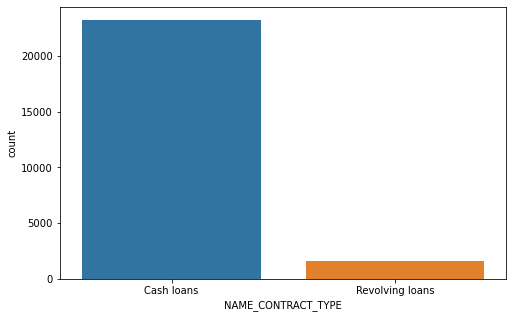

In [20]:
paymentdifficulty(df1,"NAME_CONTRACT_TYPE")

- Total __Cashloan__ given are 278232 out of which 23221 around __8.35%__ falls in  payment difficulty condition.
- Total __Revolving loans__ given are 29279 out of which 1604 around __5.79%__ falls in  payment difficulty condition.           
Here we can Confirm fact in Revolving loan Category payment difficulty is less

## 3.1.3 CODE_GENDER

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


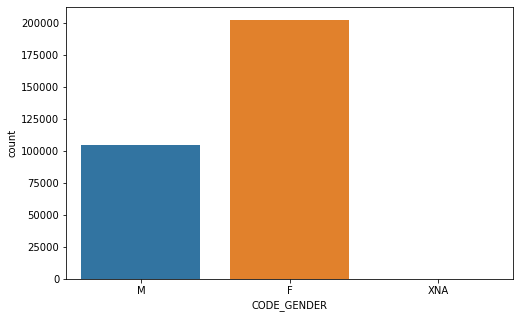

In [21]:
overalldata(df,"CODE_GENDER")

Female population is more than Male and XNA are very less compare to other so there effect acn be ignored.

- __Payment Difficulty__

F    14170
M    10655
Name: CODE_GENDER, dtype: int64


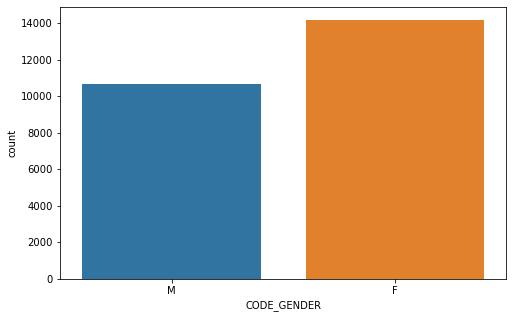

In [22]:
paymentdifficulty(df1,"CODE_GENDER")

- Total 202448 Female client were there out of which 14170 around __7%__ have payment difficulty.
- Total 105059 Male client were there out of which 10655 around __10.14%__ have payment difficulty.                           

Here it is clearly seen that male clients have more payment difficulty than female one.

## 3.1.4 FLAG_OWN_CAR

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


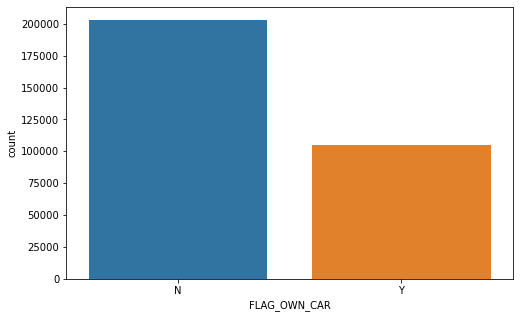

In [23]:
overalldata(df,"FLAG_OWN_CAR")

The population of people without car is more than who possessed car.

- __Payment Difficulty__

N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64


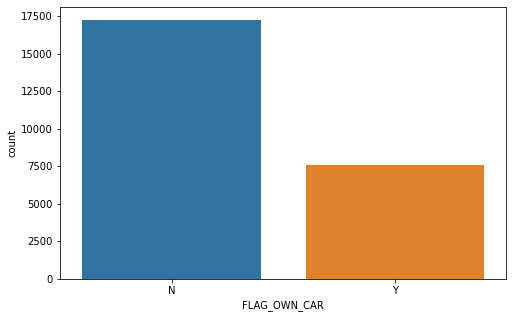

In [24]:
paymentdifficulty(df1,"FLAG_OWN_CAR")

- There are total 202924 client with no car out of which 17249 around __8.5%__ have payment difficulty.
- There are total 104587 client with car out of which 7576 around __7.24%__ have payment difficulty.

Client not having car has more payment difficulty.

## 3.1.5 FLAG_OWN_REALTY

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


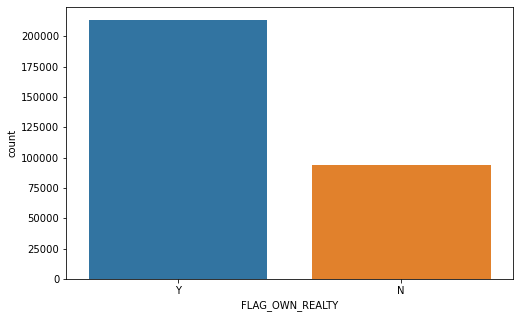

In [25]:
overalldata(df,"FLAG_OWN_REALTY")

The population of people with flat is more than who does not.

- __Payment Difficulty__

Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64


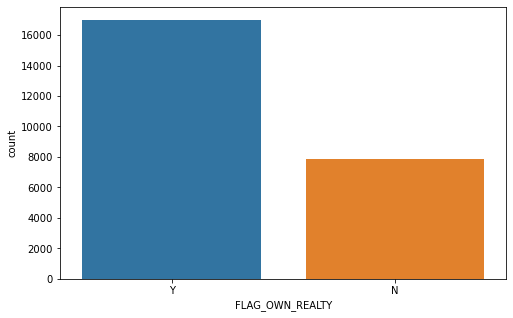

In [26]:
paymentdifficulty(df1,"FLAG_OWN_REALTY")

- There are total 213312 client with flat out of which 16983 around __7.96%__ have payment difficulty.
- There are total 94199 client withot flat out of which 7842 around __8.32%__ have payment difficulty.

Client not having flat has more payment difficulty.


## 3.1.6 NAME_INCOME_TYPE

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


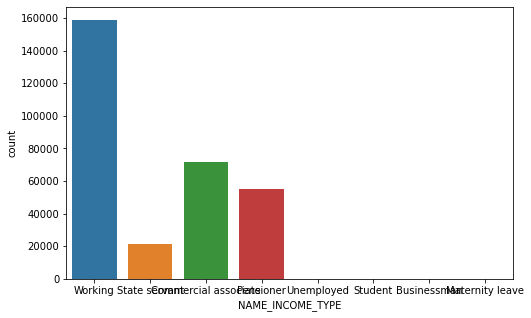

In [27]:
overalldata(df,"NAME_INCOME_TYPE")

The major chunk of client belongs to 4 categories Working,Commercial associate,Pensioner, State servant

- __Payment Difficulty__

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64


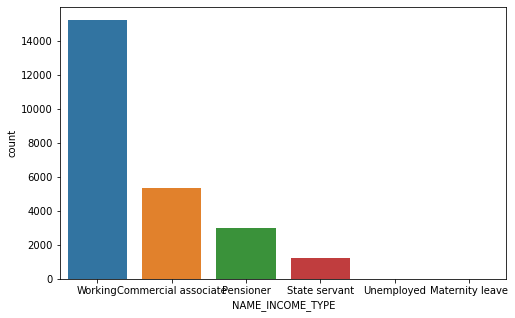

In [28]:
paymentdifficulty(df1,"NAME_INCOME_TYPE")

- There are total 158774 Working client out of which 15224 around __9.59%__ have payment difficulty.
- There are total 71017 Commercial associate client out of which 5360 around __7.55%__ have payment difficulty.
- There are total 55362 Pensioner client out of which 2982 around __5.39%__ have payment difficulty.
- There are total 21703 State Servant client out of which 1249 around __5.75%__ have payment difficulty.
- There are total 22 Unemployed client out of which 8 around __36.36%__ have payment difficulty.
- There are total 5 Maternity leave client out of which 2 around __40%__ have payment difficulty.

Here it is clearly seen Unemployed and Maternity leave client highest percent of payment difficulty whereas Students and Businessmen has no payment difficulty. 




## 3.1.7 NAME_EDUCATION_TYPE

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


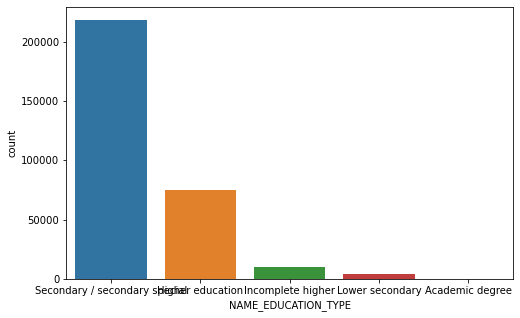

In [29]:
overalldata(df,"NAME_EDUCATION_TYPE")

The population of people with Secondary / secondary special is more than others.

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64


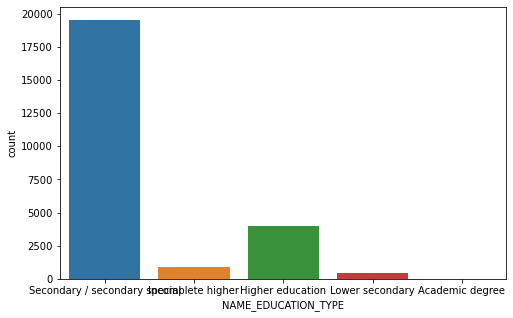

In [30]:
paymentdifficulty(df1,"NAME_EDUCATION_TYPE")

- There are total 218391 Secondary / secondary special client out of which 19524 around __8.94%__ have payment difficulty.
- There are total 74863 Higher education client out of which 4009 around __5.35%__ have payment difficulty.
- There are total 10277 Incomplete higher client out of which 872 around __8.48%__ have payment difficulty.
- There are total 3816 Lower secondary client out of which 417 around __10.93%__ have payment difficulty.
- There are total 164 Academic degree client out of which 3 around __1.83%__ have payment difficulty.


Here it is clearly seen Secondary / secondary special client,Incomplete higher client and Lower secondary client has highest percent of payment difficulty whereas Academic degree has very less payment difficulty. 

## 3.1.8 NAME_FAMILY_STATUS

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


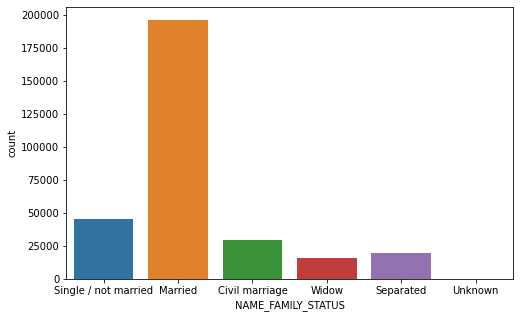

In [31]:
overalldata(df,"NAME_FAMILY_STATUS")

The population of people who are married is more than all other.

- __Payment Difficulty__

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64


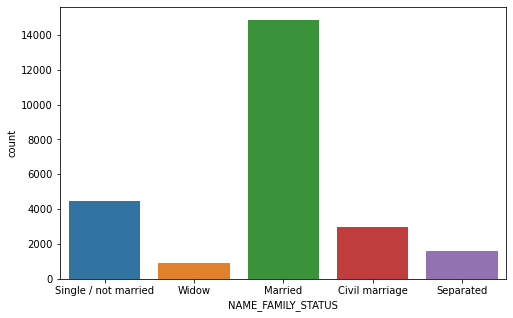

In [32]:
paymentdifficulty(df1,"NAME_FAMILY_STATUS")

- There are total 196432 Married client out of which 14850 around __7.56%__ have payment difficulty.
- There are total 45444 Single/not married client out of which 4457 around __9.81%__ have payment difficulty.
- There are total 29775 Civil marriage client out of which 2961 around __9.94%__ have payment difficulty.
- There are total 19770 Seperated client out of which 1620 around __8.19%__ have payment difficulty.
- There are total 16088 Widow client out of which 937 around __5.82%__ have payment difficulty.


Here it is clearly seen Single/not married client,Civil Marriage client and Seperated client has highest percent of payment difficulty.

## 3.1.9 NAME_HOUSING_TYPE

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


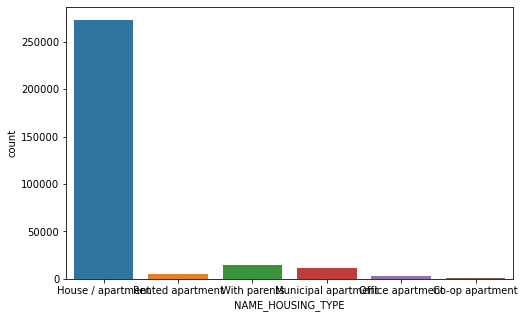

In [33]:
overalldata(df,"NAME_HOUSING_TYPE")

The population of people with House/apartment is most among all.

House / apartment      21272
With parents            1736
Municipal apartment      955
Rented apartment         601
Office apartment         172
Co-op apartment           89
Name: NAME_HOUSING_TYPE, dtype: int64


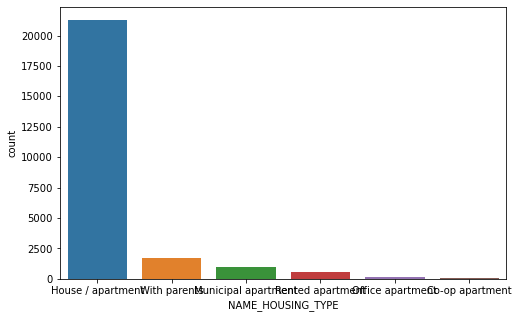

In [34]:
paymentdifficulty(df1,"NAME_HOUSING_TYPE")

- There are total 272868 House / apartment client out of which 21272 around __7.80%__ have payment difficulty.
- There are total 14840 With parents client out of which 1736 around __11.70%__ have payment difficulty.
- There are total 11183 Municipal apartment client out of which 955 around __8.54%__ have payment difficulty.
- There are total 4881 Rented apartment client out of which 601 around __12.31%__ have payment difficulty.
- There are total 2617 Office apartment client out of which 172 around __6.57%__ have payment difficulty.
- There are total 1122 Co-op apartment client out of which 89 around __7.93%__ have payment difficulty.


Here it is clearly seen With parents client,Rented apartment client has highest percent of payment difficulty.

## 3.1.10 FLAG_MOBIL

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64


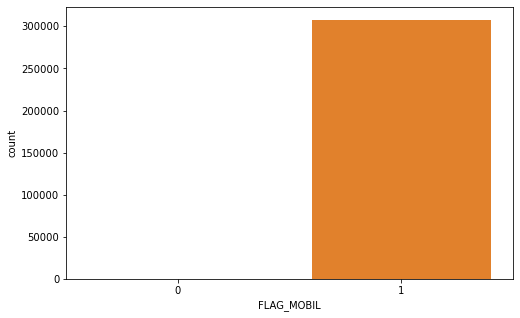

In [35]:
overalldata(df,"FLAG_MOBIL")

ALmost all possessed mobile so there is no special info could be generated as it will have same value all row and could be the candidate for dropping of column

## 3.1.11 FLAG_EMP_PHONE

1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64


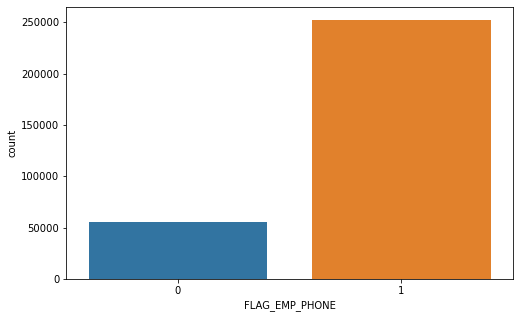

In [36]:
overalldata(df,"FLAG_EMP_PHONE")

Generally client do provide workphone.

- __Payment Difficulty__

1    21834
0     2991
Name: FLAG_EMP_PHONE, dtype: int64


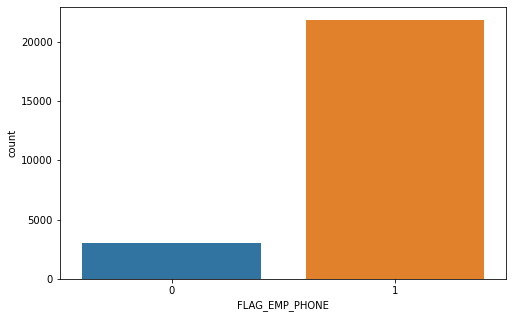

In [37]:
paymentdifficulty(df1,"FLAG_EMP_PHONE")

- There are total 252125 client which provided Work phone number out of which 21834 around __8.66%__ have payment difficulty.
- There are total 55386 client which not provided Work phone number out of which 2991 around __5.40%__ have payment difficulty.

Client providining workphone has more payment difficulty.


## 3.1.12 FLAG_CONT_MOBILE

1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64


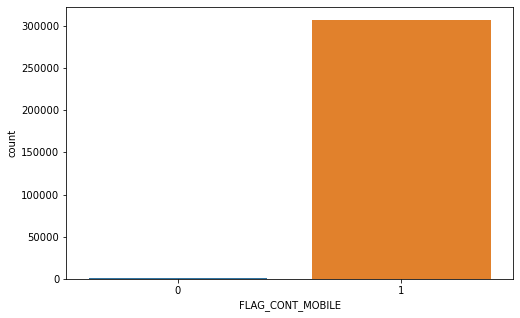

In [38]:
overalldata(df,"FLAG_CONT_MOBILE")

Most of the client phones are reachable

- __Payment Difficulty__

1    24780
0       45
Name: FLAG_CONT_MOBILE, dtype: int64


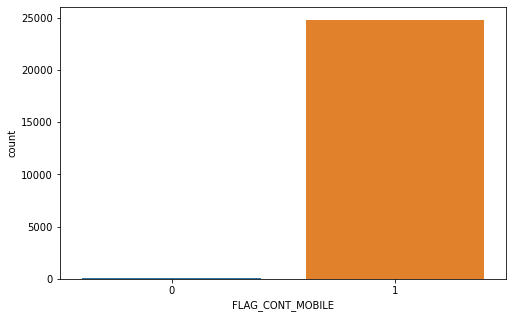

In [39]:
paymentdifficulty(df1,"FLAG_CONT_MOBILE")

- There are total 306937 client whose phone was reachable out of which 24780 around __8.07%__ have payment difficulty.
- There are total 574 client whose phone was not reachable out of which 45 around __7.83%__ have payment difficulty.

Both categoties proportion are almost same cannot be distinguished properly.

# 3.1.13 FLAG_EMAIL

0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64


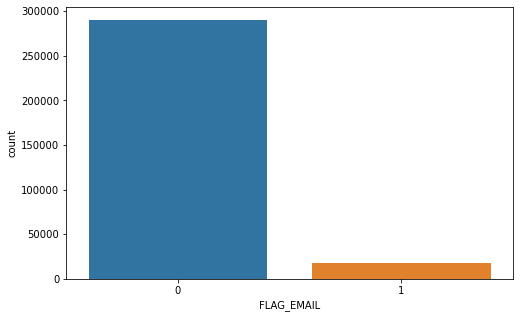

In [40]:
overalldata(df,"FLAG_EMAIL")

Major proportion of client does not provide mail.

- __Payment Difficulty__

0    23451
1     1374
Name: FLAG_EMAIL, dtype: int64


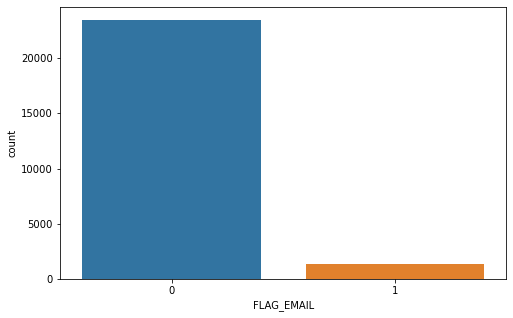

In [41]:
paymentdifficulty(df1,"FLAG_EMAIL")

- There are total 290069 client who not provude mail out of which 23451 around __8.08%__ have payment difficulty.
- There are total 17442 client who not provude mail out of which 1374 around __7.88%__ have payment difficulty.

Here not much difference between two categories.


## 3.1.14 OCCUPATION_TYPE

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


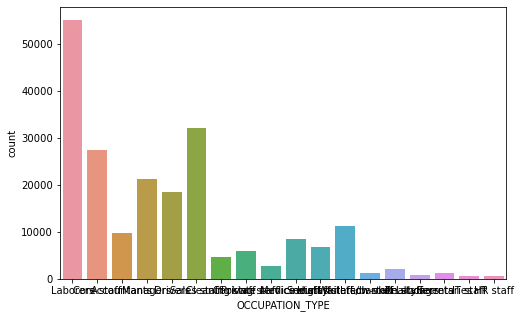

In [42]:
overalldata(df,"OCCUPATION_TYPE")

Here lot of data around 32% data is missing which is more than all the category so no concrete information could fe found out

## 3.1.15 CNT_FAM_MEMBERS

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
NaN          2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64


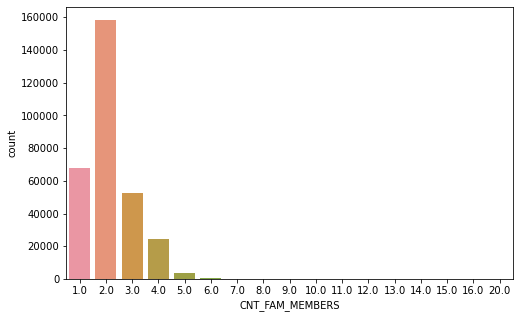

In [43]:
overalldata(df,"CNT_FAM_MEMBERS")

Majorly count of family members varies from 0 t0 5

- __Payment Difficulty__

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
11.0        1
10.0        1
13.0        1
Name: CNT_FAM_MEMBERS, dtype: int64


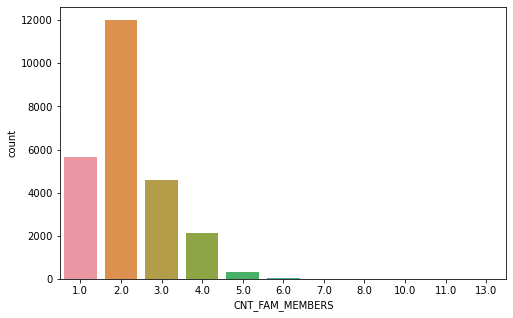

In [44]:
paymentdifficulty(df1,"CNT_FAM_MEMBERS")

- There are total 158357 2 member client out of which 12009 around __7.58%__ have payment difficulty.
- There are total 67847 1 member client out of which 5675 around __8.36%__ have payment difficulty.
- There are total 52601 3 member client out of which 4608 around __8.76%__ have payment difficulty.
- There are total 24697 4 member client out of which 2136 around __8.65%__ have payment difficulty.
- There are total 3478 5 member client out of which 327 around __9.41%__ have payment difficulty.


Here it is clearly seen 2 member percent of payment difficulty is least.

## 3.1.16 REGION_RATING_CLIENT

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64


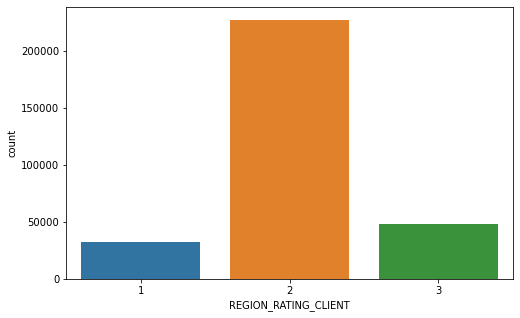

In [45]:
overalldata(df,"REGION_RATING_CLIENT")

Major portion of client live rating 2 category

- __Payment Difficulty__

2    17907
3     5366
1     1552
Name: REGION_RATING_CLIENT, dtype: int64


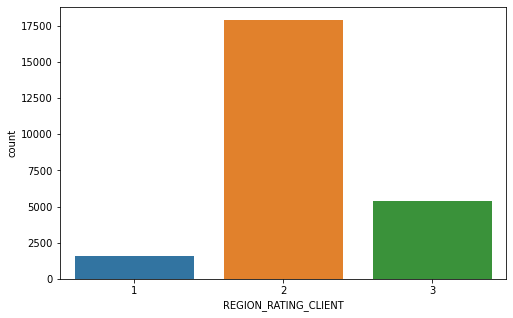

In [46]:
paymentdifficulty(df1,"REGION_RATING_CLIENT")

- There are total 226984 client with rating 2 out of which 17907 around __7.89%__ have payment difficulty.
- There are total 48330 client with rating 3 out of which 5366 around __11.10%__ have payment difficulty.
- There are total 32197 client with rating 1 out of which 1552 around __4.82%__ have payment difficulty.

Here clearly most difficulty with rating 3 client and least among rating 1 clients.

## 3.1.17 REG_REGION_NOT_LIVE_REGION

0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64


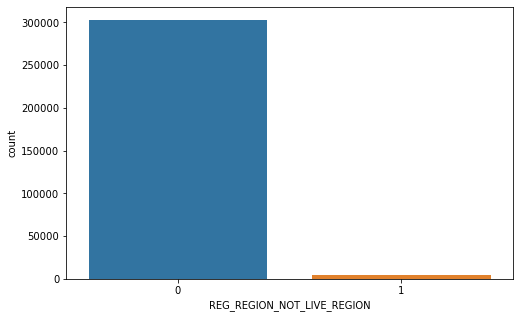

In [47]:
overalldata(df,"REG_REGION_NOT_LIVE_REGION")

Majority of client's permanent address match contact address 

- __Payment Difficulty__

0    24392
1      433
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64


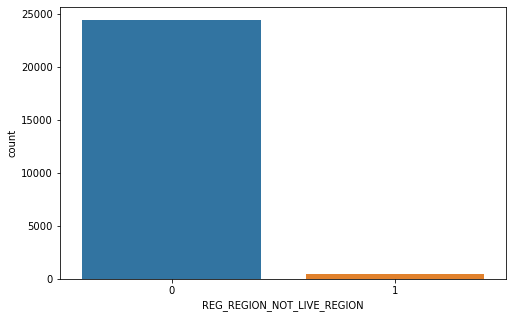

In [48]:
paymentdifficulty(df1,"REG_REGION_NOT_LIVE_REGION")

- There are total 302854 client's permanent address match contact address out of which 24392 around __8.05%__ have payment difficulty.
- There are total 4657 client's permanent address does not match contact address out of which 433 around __9.30%__ have payment difficulty.

AS contact address does not match permanent address payment difficulty increases.

## 3.1.18 REG_REGION_NOT_WORK_REGION

0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64


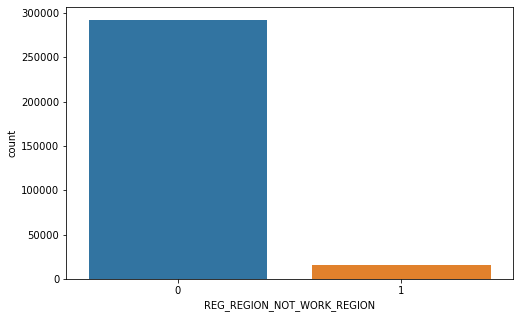

In [49]:
overalldata(df,"REG_REGION_NOT_WORK_REGION")

Majority of client's permanent address match Work address

0    23437
1     1388
Name: REG_REGION_NOT_WORK_REGION, dtype: int64


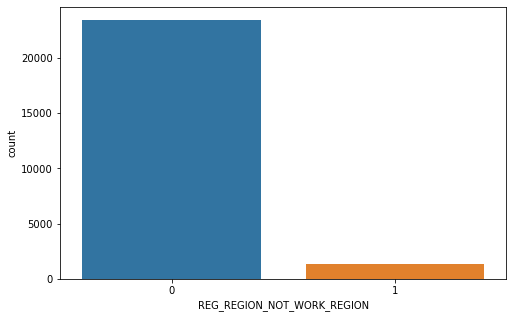

In [50]:
paymentdifficulty(df1,"REG_REGION_NOT_WORK_REGION")

- There are total 291899 client's permanent address match work address out of which 23437 around __8.03%__ have payment difficulty.
- There are total 15612 client's permanent address does not work contact address out of which 1388 around __8.89%__ have payment difficulty.

AS work address does not match permanent address payment difficulty increases.

## 3.1.19 LIVE_REGION_NOT_WORK_REGION

0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64


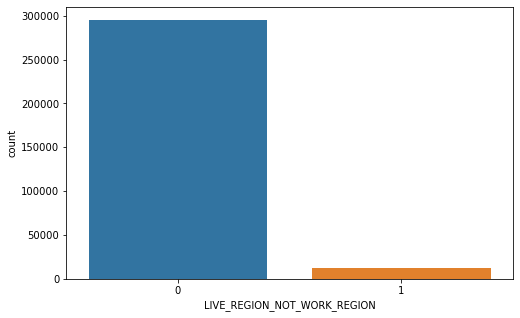

In [51]:
overalldata(df,"LIVE_REGION_NOT_WORK_REGION")

Majority of client's contact address match Work address

0    23769
1     1056
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64


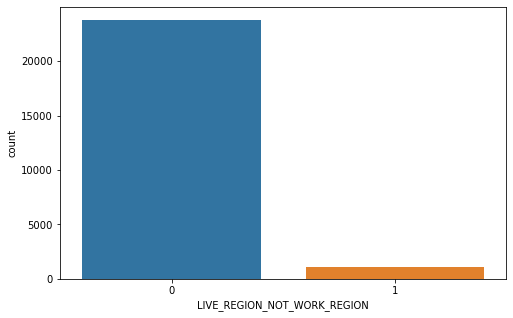

In [52]:
paymentdifficulty(df1,"LIVE_REGION_NOT_WORK_REGION")

- There are total 295008 client's contact address match work address out of which 23769 around __8.06%__ have payment difficulty.
- There are total 12503 client's contact address does not match work contact address out of which 1056 around __8.45%__ have payment difficulty.

AS contact address does not match work address payment difficulty increases.

__CITY LEVEL__

## 3.1.20 REG_CITY_NOT_LIVE_CITY

0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64


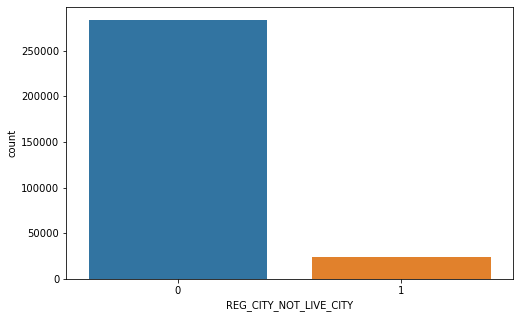

In [53]:
overalldata(df,"REG_CITY_NOT_LIVE_CITY")

Majority of client's permanent address match contact address

- __Payment Difficulty__

0    21886
1     2939
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64


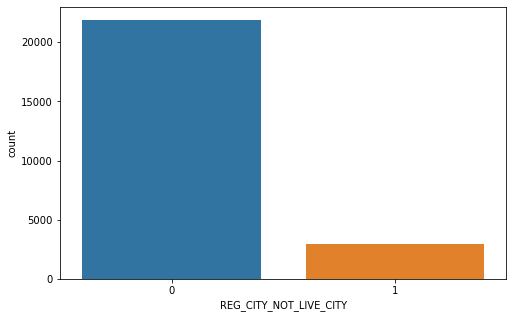

In [54]:
paymentdifficulty(df1,"REG_CITY_NOT_LIVE_CITY")

- There are total 283472 client's permanent address match contact address out of which 21886 around __7.72%__ have payment difficulty.
- There are total 24039 client's permanent address does not match contact address out of which 2939 around __12.22%__ have payment difficulty.

AS contact address does not match permanent address payment difficulty increases.

## 3.1.21 REG_CITY_NOT_WORK_CITY

0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64


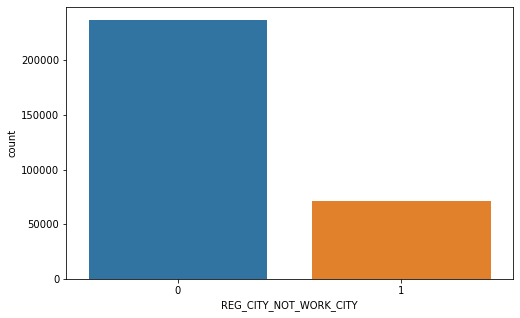

In [55]:
overalldata(df,"REG_CITY_NOT_WORK_CITY")

Majority of client's permanent address match Work address

0    17305
1     7520
Name: REG_CITY_NOT_WORK_CITY, dtype: int64


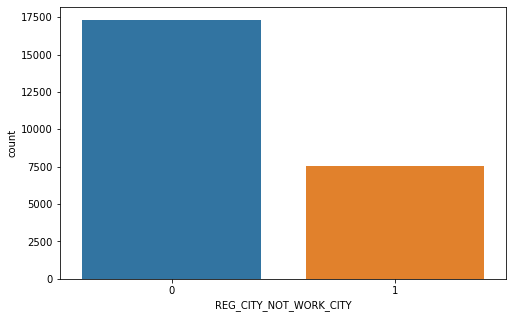

In [56]:
paymentdifficulty(df1,"REG_CITY_NOT_WORK_CITY")

- There are total 236644 client's permanent address match work address out of which 17305 around __7.31%__ have payment difficulty.
- There are total 70867 client's permanent address does not work contact address out of which 7520 around __10.61%__ have payment difficulty.

AS work address does not match permanent address payment difficulty increases.

## 3.1.22 LIVE_CITY_NOT_WORK_CITY

0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


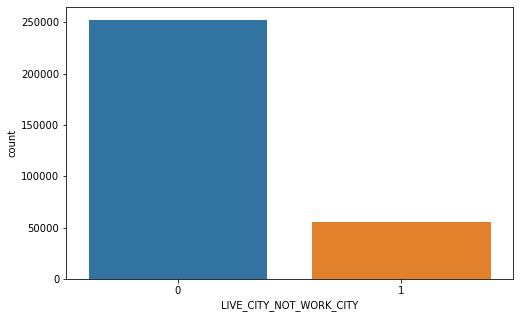

In [57]:
overalldata(df,"LIVE_CITY_NOT_WORK_CITY")

Majority of client's contact address match Work address

0    19322
1     5503
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


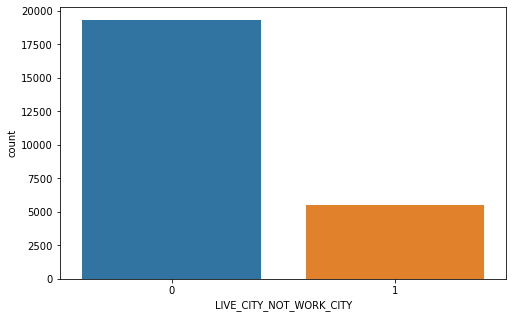

In [58]:
paymentdifficulty(df1,"LIVE_CITY_NOT_WORK_CITY")

- There are total 252296 client's contact address match work address out of which 19322 around __7.66%__ have payment difficulty.
- There are total 55215 client's contact address does not match work contact address out of which 5503 around __9.97%__ have payment difficulty.

AS contact address does not match work address payment difficulty increases.

__As it could be seen diffference at city level is much prominent as compare to region level if addresses does not match.__

## 3.1.23 FLAG_DOCUMENT_3

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64


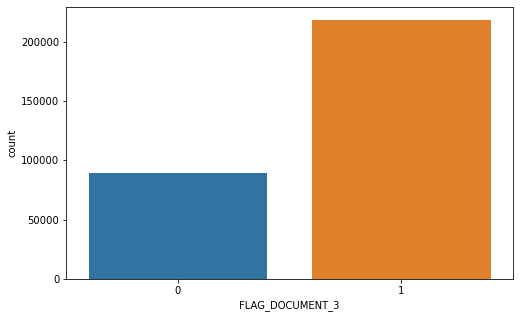

In [59]:
overalldata(df,"FLAG_DOCUMENT_3")

we can see that clients who have document 3 are more.

1    19312
0     5513
Name: FLAG_DOCUMENT_3, dtype: int64


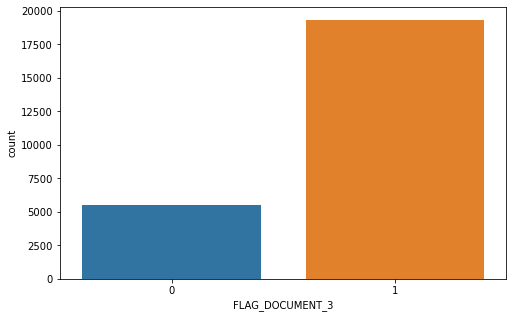

In [60]:
paymentdifficulty(df1,"FLAG_DOCUMENT_3")

*  There are total  218340  client who has documet 3 out of which 19312 around __11.30__% have payment difficulty.
*   There are total  89171
  client who has documet 3 out of which 5513 around __16.174__% have payment difficulty.

we can see that the clients who  have document 3 are having more problem in payment.


## 3.1.24 FLAG_DOCUMENT_4

0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64


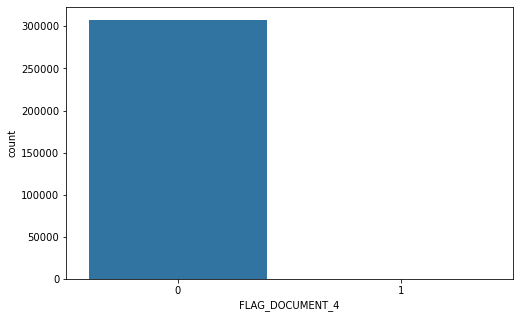

In [61]:
overalldata(df,"FLAG_DOCUMENT_4")

we can see that clients who dont have document 4 are more


0    24825
Name: FLAG_DOCUMENT_4, dtype: int64


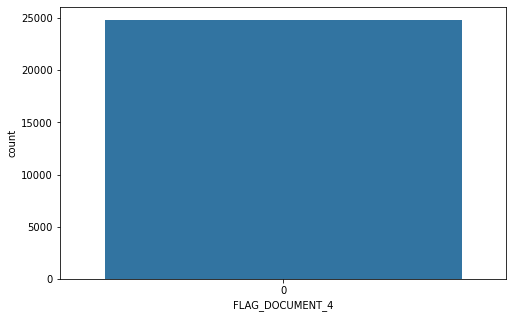

In [62]:
paymentdifficulty(df1,"FLAG_DOCUMENT_4")



*    There are total  307486  client who dont have documet 4 out of which 24825 around __13.38__% have payment difficulty.
*   There are no client who have document 4 and facing the payment difficulty



## 3.1.25 FLAG_DOCUMENT_5 

0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64


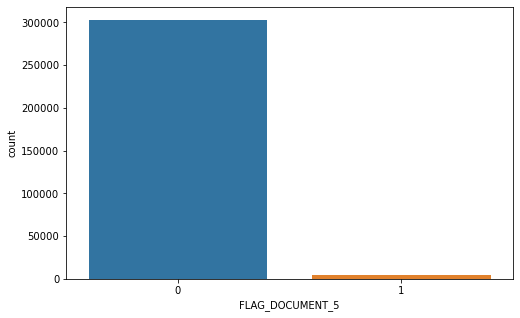

In [63]:
overalldata(df,"FLAG_DOCUMENT_5")

we can see that most of the people dont have document 5

0    24453
1      372
Name: FLAG_DOCUMENT_5, dtype: int64


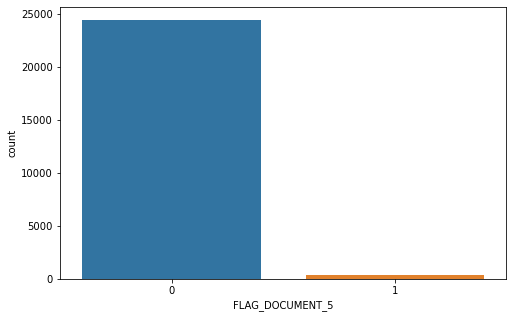

In [64]:
paymentdifficulty(df1,"FLAG_DOCUMENT_5")



*   There are total   302863  client who dont have documet 5 out of which 24453 around __13.38__% have payment difficulty.
*   There are total   4648  client who  have documet 5 out of which 372 around __12.49__% have payment difficulty.
as we can see that clients who have document 5 or dont have document  5 having almost same problem in payment.



## 3.1.13 FLAG_DOCUMENT_6

0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64


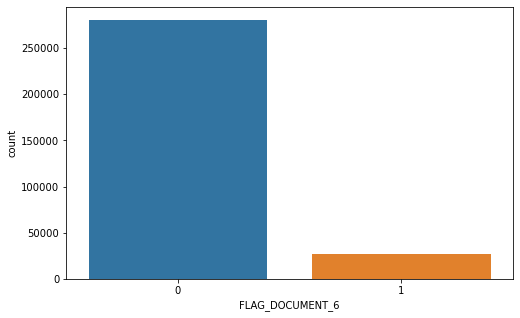

In [65]:
overalldata(df,"FLAG_DOCUMENT_6")

There are 280433 clients who dont have document 6 and 27078 have document 6 and we can see that most of the clients dont have document 6

0    23318
1     1507
Name: FLAG_DOCUMENT_6, dtype: int64


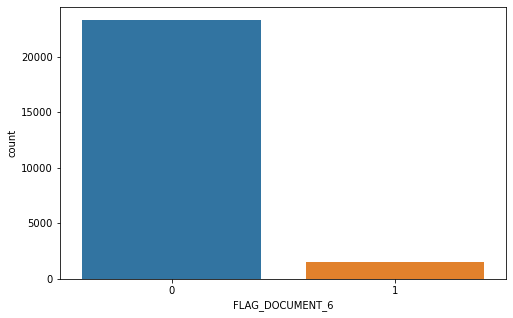

In [66]:
paymentdifficulty(df1,"FLAG_DOCUMENT_6")


*   There are total   280433  client who dont have documet 6 out of which 23318 around __12.02__% have payment difficulty.
*   There are total   27078  client who  have documet 6 out of which 1507 around __17.96__% have payment difficulty.
we can see that clients who have document 6 having more problem in payment.





## 3.1.26 FLAG_DOCUMENT_7

0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64


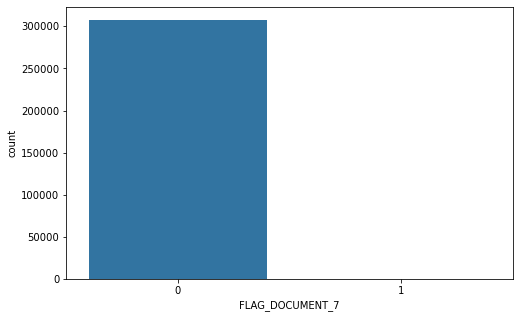

In [67]:
overalldata(df,"FLAG_DOCUMENT_7")

we can see that most of the clients dont have Document 7

0    24822
1        3
Name: FLAG_DOCUMENT_7, dtype: int64


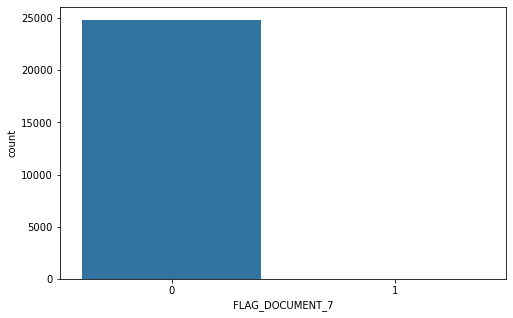

In [68]:
paymentdifficulty(df1,"FLAG_DOCUMENT_7")


*   There are total   307452  client who dont have documet 7 out of which 24822 around __12.38__% have payment difficulty.
*   There are total   59  client who  have documet 7 out of which 3 around __19.66__% have payment difficulty.

we can see that clients who have document 7 having more problem in payment.





## 3.1.27 FLAG_DOCUMENT_8 

0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64


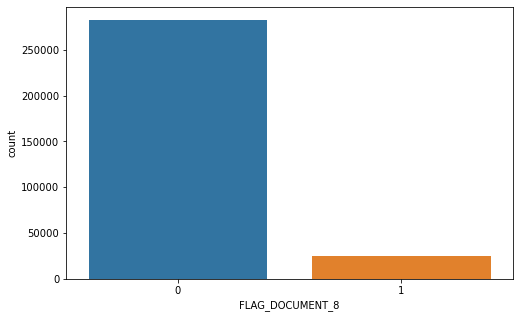

In [69]:
overalldata(df,"FLAG_DOCUMENT_8")

0    22989
1     1836
Name: FLAG_DOCUMENT_8, dtype: int64


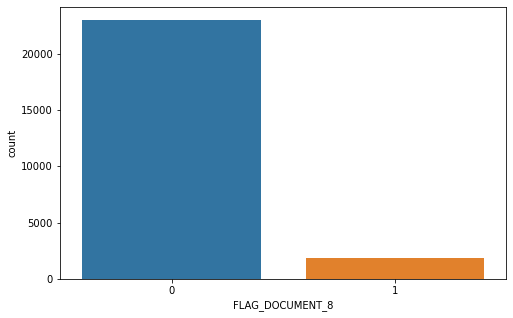

In [70]:
paymentdifficulty(df1,"FLAG_DOCUMENT_8")


*   There are total   282487  client who dont have documet 8 out of which 22989 around __12.28__% have payment difficulty.
*   There are total   25024  client who  have documet 8 out of which 1836 around __13.62__% have payment difficulty.





## 3.1.28 FLAG_DOCUMENT_9

0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64


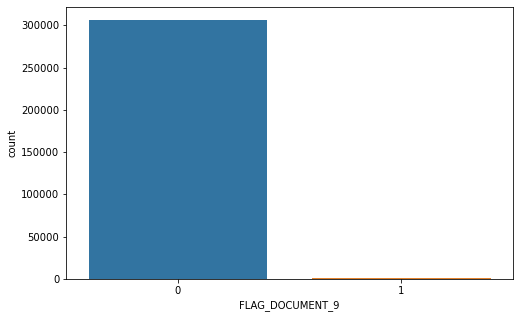

In [71]:
overalldata(df,"FLAG_DOCUMENT_9")

0    24751
1       74
Name: FLAG_DOCUMENT_9, dtype: int64


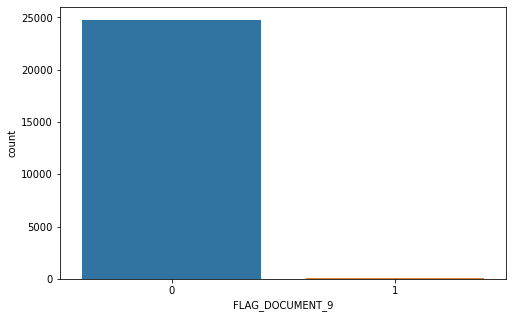

In [72]:
paymentdifficulty(df1,"FLAG_DOCUMENT_9")


*   There are total   306313  client who dont have documet 9 out of which 24751 around __12.37__% have payment difficulty.
*   There are total   1198  client who  have documet 9 out of which 74 around __16.18__% have payment difficulty.

we can see that clients who have document 9 having more problem in payment.




## 3.1.29 FLAG_DOCUMENT_10

0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64


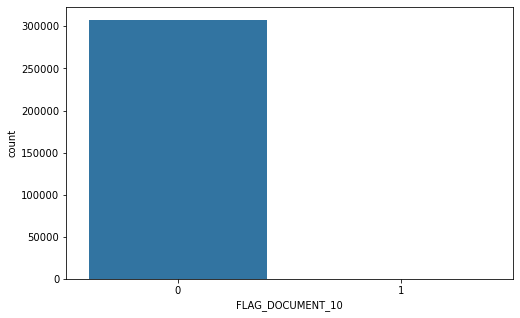

In [73]:
overalldata(df,"FLAG_DOCUMENT_10")

0    24825
Name: FLAG_DOCUMENT_10, dtype: int64


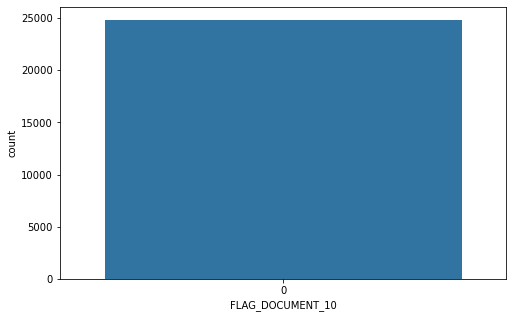

In [74]:
paymentdifficulty(df1,"FLAG_DOCUMENT_10")


*   There are total   307504  client who dont have documet 9 out of which 24825 around __12.38__% have payment difficulty.
*   There are total   7  client who  have documet 9 and no one is facing the payment difficulty





## 3.1.30 FLAG_DOCUMENT_11

0    306308
1      1203
Name: FLAG_DOCUMENT_11, dtype: int64


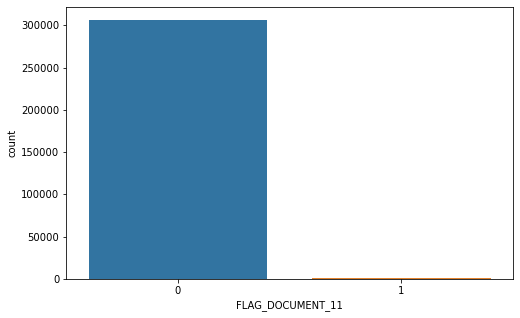

In [75]:
overalldata(df,"FLAG_DOCUMENT_11")

0    24750
1       75
Name: FLAG_DOCUMENT_11, dtype: int64


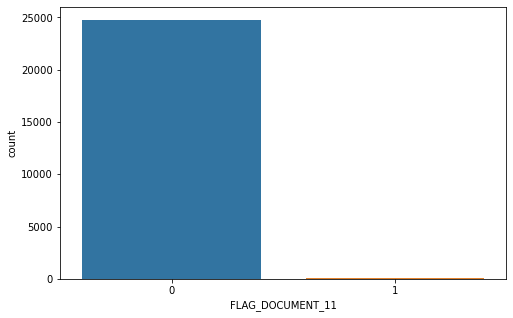

In [76]:
paymentdifficulty(df1,"FLAG_DOCUMENT_11")


*   There are total   306308  client who dont have documet 9 out of which 24750 around __12.37__% have payment difficulty.
*   There are total   1203  client who  have documet 9 out of which 75 around __16.04__% have 
payment difficulty.

we can see that clients who have document 11 having more problem in payment.





## 3.1.30 FLAG_DOCUMENT_12








0    307509
1         2
Name: FLAG_DOCUMENT_12, dtype: int64


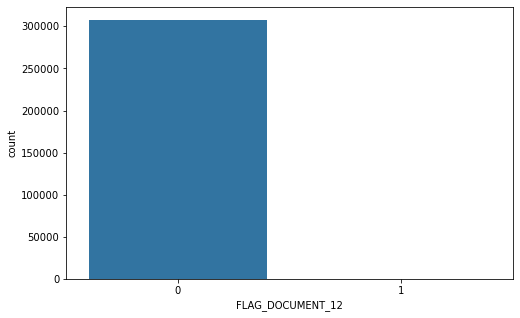

In [77]:
overalldata(df,"FLAG_DOCUMENT_12")

0    24825
Name: FLAG_DOCUMENT_12, dtype: int64


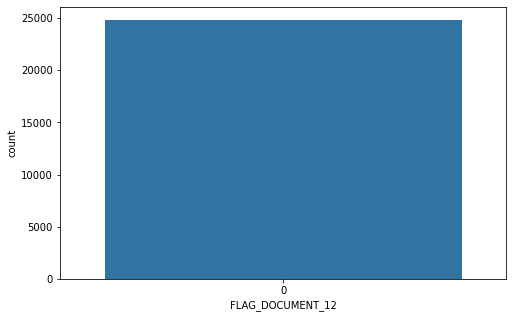

In [78]:
paymentdifficulty(df1,"FLAG_DOCUMENT_12")


*   There are total   307509  client who dont have documet 9 out of which 24825 around __12.38__% have payment difficulty.
*   There are total   2  client who  have documet 9 and no one facing
payment difficulty.





## 3.1.32 FLAG_DOCUMENT_13





0    306427
1      1084
Name: FLAG_DOCUMENT_13, dtype: int64


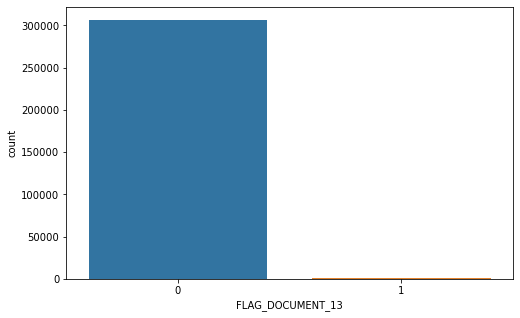

In [79]:
overalldata(df,"FLAG_DOCUMENT_13")

0    24795
1       30
Name: FLAG_DOCUMENT_13, dtype: int64


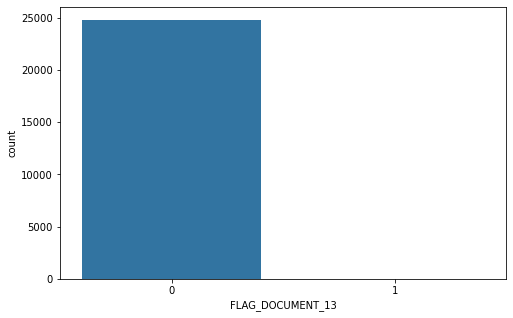

In [80]:
paymentdifficulty(df1,"FLAG_DOCUMENT_13")


*   There are total   306427  client who dont have documet 13 out of which 24795 around __12.35__% have payment difficulty.
*   There are total   1084 client who  have documet 13 and out of which 30  around __36.13__% having
payment difficulty.

we can see that clients who have document 13 having more problem in payment. and the number is very high who are not able to do payment


## 3.1.33 FLAG_DOCUMENT_14


0    306608
1       903
Name: FLAG_DOCUMENT_14, dtype: int64


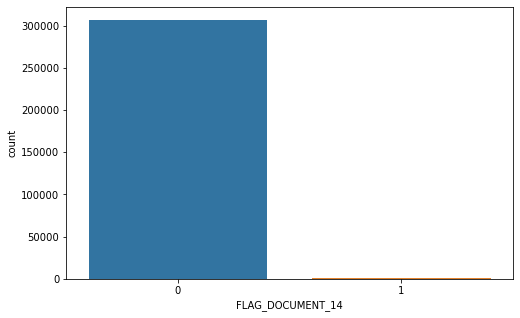

In [81]:
overalldata(df,"FLAG_DOCUMENT_14")

0    24795
1       30
Name: FLAG_DOCUMENT_14, dtype: int64


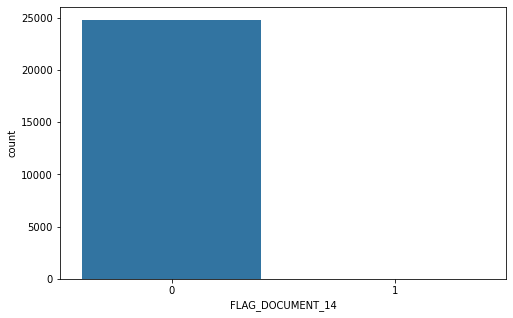

In [82]:
paymentdifficulty(df1,"FLAG_DOCUMENT_14")


*   There are total   306608  client who dont have documet 14 out of which 24795 around __12.36__% have payment difficulty.
*   There are total   903 client who  have documet 14 and out of which 30  around __30.10__% having
payment difficulty.

we can see that clients who have document 14 having more problem in payment. and the number is very high who are not able to do payment

## 3.1.34 FLAG_DOCUMENT_15


0    307139
1       372
Name: FLAG_DOCUMENT_15, dtype: int64


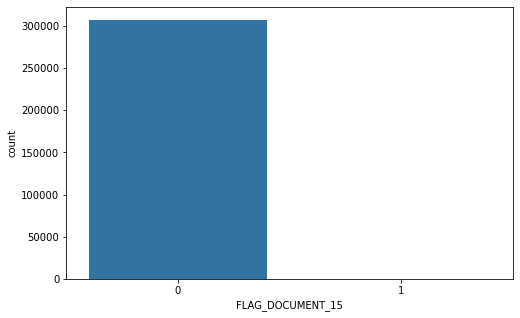

In [83]:
overalldata(df,"FLAG_DOCUMENT_15")

0    24814
1       11
Name: FLAG_DOCUMENT_15, dtype: int64


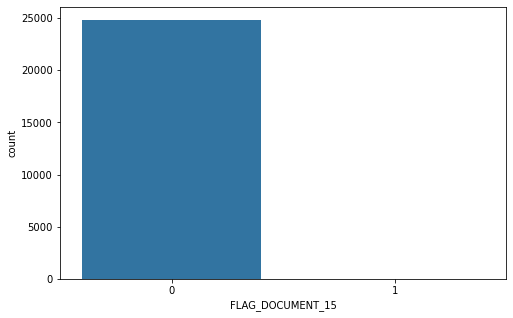

In [84]:
paymentdifficulty(df1,"FLAG_DOCUMENT_15")


*   There are total   307139  client who dont have documet 15 out of which 24814 around __12.37__% have payment difficulty.
*   There are total   372 client who  have documet 15 and out of which 11  around __33.81__% having
payment difficulty.

## 3.1.35 FLAG_DOCUMENT_16

0    304458
1      3053
Name: FLAG_DOCUMENT_16, dtype: int64


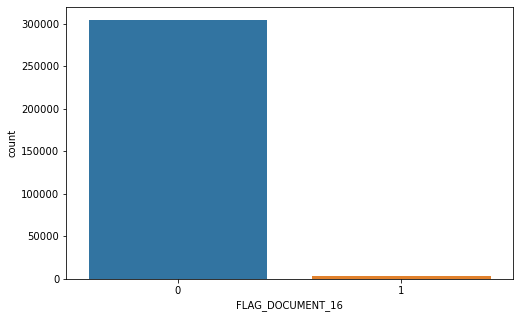

In [85]:
overalldata(df,"FLAG_DOCUMENT_16")

0    24675
1      150
Name: FLAG_DOCUMENT_16, dtype: int64


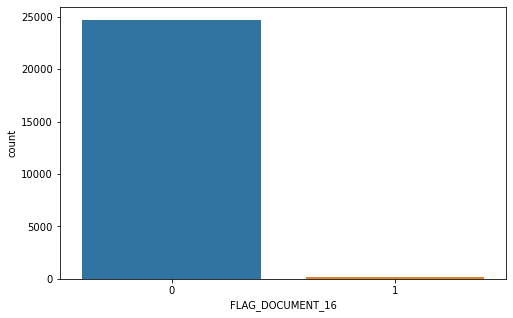

In [86]:
paymentdifficulty(df1,"FLAG_DOCUMENT_16")


*   There are total   304458  client who dont have documet 16 out of which 24675 around __12.33__% have payment difficulty.
*   There are total   3053 client who  have documet 16 and out of which 150  around __20.42__% having
payment difficulty.

## 3.1.36 FLAG_DOCUMENT_17

0    307429
1        82
Name: FLAG_DOCUMENT_17, dtype: int64


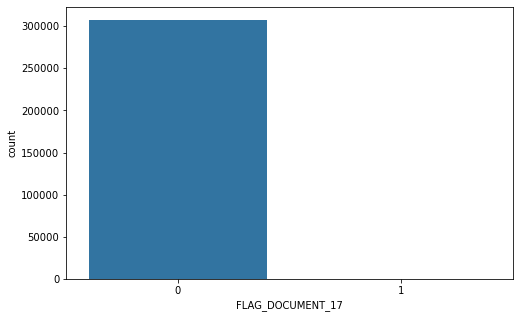

In [87]:
overalldata(df,"FLAG_DOCUMENT_17")

0    24823
1        2
Name: FLAG_DOCUMENT_17, dtype: int64


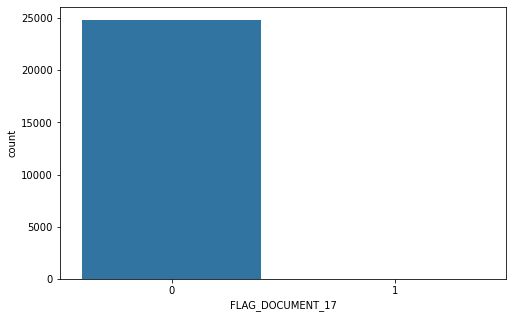

In [88]:
paymentdifficulty(df1,"FLAG_DOCUMENT_17")


*   There are total   307429  client who dont have documet 17 out of which 24823 around __12.38__% have payment difficulty.
*   There are total   82 client who  have documet 17 and out of which 2  around __41__% having
payment difficulty.

 we can see that almost half of the clients who have document 17 are not able to do payment

## 3.1.37 FLAG_DOCUMENT_18

0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64


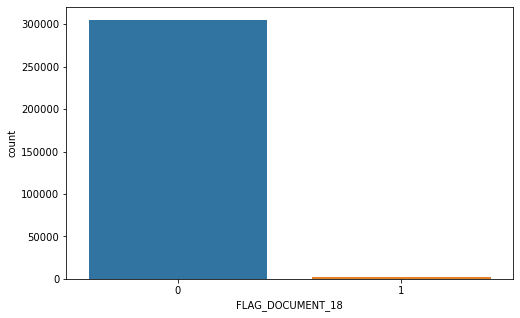

In [89]:
overalldata(df,"FLAG_DOCUMENT_18")

0    24683
1      142
Name: FLAG_DOCUMENT_18, dtype: int64


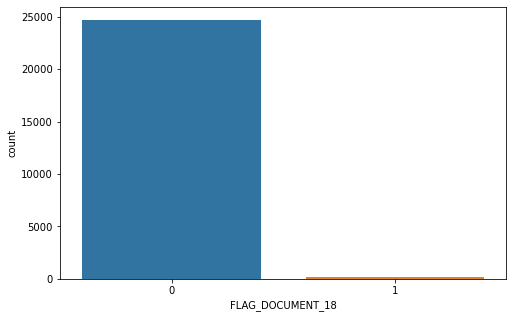

In [90]:
paymentdifficulty(df1,"FLAG_DOCUMENT_18")


*   There are total   305011  client who dont have documet 18 out of which 24683 around __12.35__% have payment difficulty.
*   There are total   2500 client who  have documet 18 and out of which 142  around __17.60__% having
payment difficulty.

## 3.1.38 FLAG_DOCUMENT_19

0    307328
1       183
Name: FLAG_DOCUMENT_19, dtype: int64


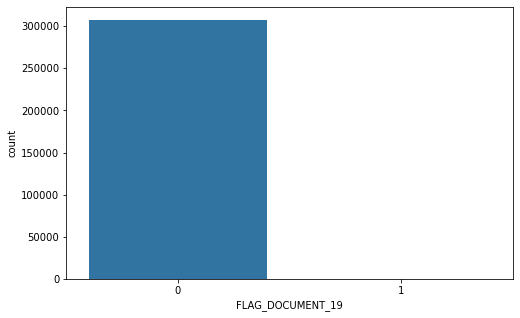

In [91]:
overalldata(df,"FLAG_DOCUMENT_19")

0    24813
1       12
Name: FLAG_DOCUMENT_19, dtype: int64


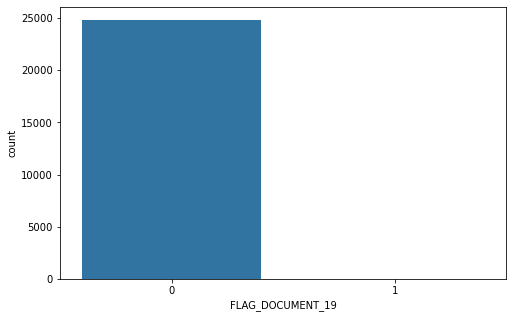

In [92]:
paymentdifficulty(df1,"FLAG_DOCUMENT_19")


*   There are total   307328  client who dont have documet 19 out of which 24813 around __12.38__% have payment difficulty.
*   There are total   183 client who  have documet 19 and out of which 12  around __15.25__% having
payment difficulty.

## 3.1.39 FLAG_DOCUMENT_20

0    307355
1       156
Name: FLAG_DOCUMENT_20, dtype: int64


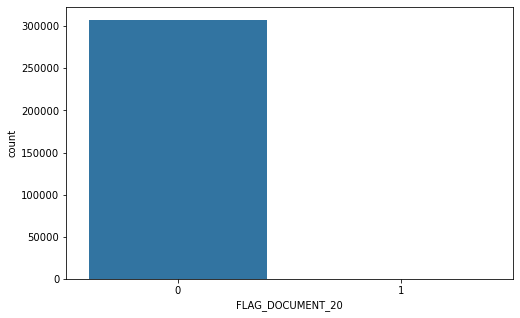

In [93]:
overalldata(df,"FLAG_DOCUMENT_20")

0    24812
1       13
Name: FLAG_DOCUMENT_20, dtype: int64


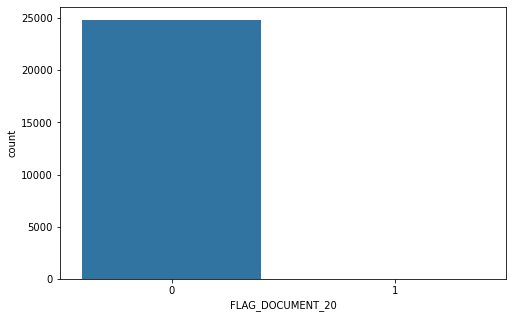

In [94]:
paymentdifficulty(df1,"FLAG_DOCUMENT_20")


*   There are total   307355  client who dont have documet 20 out of which 24812 around __12.38__% have payment difficulty.
*   There are total   156 client who  have documet 20 and out of which 13  around __12__% having
payment difficulty.

## 3.1.40 FLAG_DOCUMENT_21

0    307408
1       103
Name: FLAG_DOCUMENT_21, dtype: int64


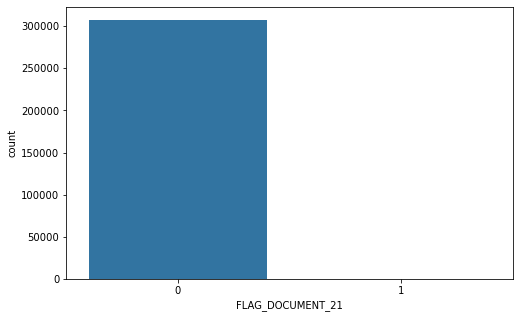

In [95]:
overalldata(df,"FLAG_DOCUMENT_21")

0    24811
1       14
Name: FLAG_DOCUMENT_21, dtype: int64


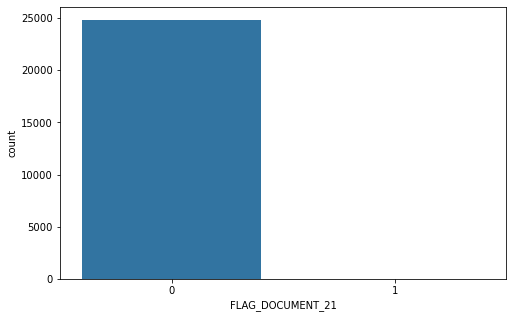

In [96]:
paymentdifficulty(df1,"FLAG_DOCUMENT_21")


*   There are total   307408  client who dont have documet 21 out of which 24811 around __12.38__% have payment difficulty.
*   There are total   103 client who  have documet 21 and out of which 14  around __7.35__% having
payment difficulty.

here the number of clients who are not having document 21 are not able to do payment are more.

## 3.1.41 AMT_REQ_CREDIT_BUREAU_HOUR

0.0    264366
NaN     41519
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


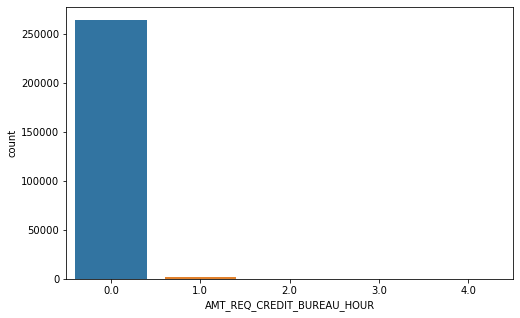

In [97]:
overalldata(df,"AMT_REQ_CREDIT_BUREAU_HOUR")

There are 264366 clients who have 0 queries and these are the maximum among all


There are lots of NaN values present in this attribute

0.0    20402
NaN     4292
1.0      125
2.0        6
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


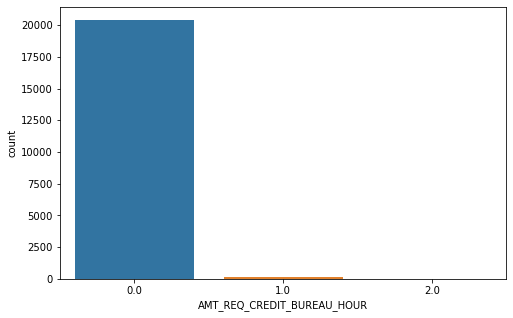

In [98]:
paymentdifficulty(df1,"AMT_REQ_CREDIT_BUREAU_HOUR")


*  there are 264366 clients who having zero query before one hour the applicationout of which 20402 having defficulties in payment that is arround __12.95__%.

*  there are 1560 clients who having one query before one hour the applicationout of which 125 having defficulties in payment that is arround __12.48__%.
*  there are 56 clients who having two query before one hour the applicationout of which 6 having defficulties in payment that is arround __9.33__%.  



# Analyse Previous application Data

In [99]:
data = pd.read_csv("/home/hunter/Desktop/stige/previous_application.csv")
data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Basic Check

In [100]:
pd.DataFrame({"Rows":data.shape[0],"Columns":data.shape[1]},index = [1])

,Rows,Columns
1,1670214,37


In [101]:
pd.DataFrame({"Column Name":data.columns})

,Column Name
0,SK_ID_PREV
1,SK_ID_CURR
2,NAME_CONTRACT_TYPE
3,AMT_ANNUITY
4,AMT_APPLICATION
5,AMT_CREDIT
6,AMT_DOWN_PAYMENT
7,AMT_GOODS_PRICE
8,WEEKDAY_APPR_PROCESS_START
9,HOUR_APPR_PROCESS_START


# Missing values

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [103]:
missing = data.isnull().sum()
missing = missing[missing>0]# Taking values where there are missing values
miss_per = round(missing/len(data),3)*100
pd.DataFrame({"Missing Entries":missing,"Missing Percentage":miss_per}).sort_values("Missing Percentage",ascending = False)

,Missing Entries,Missing Percentage
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


Lot of missing data is here some columns have missing percentage over 90 that need to be dropped

# Descriptive Statistics

In [104]:
data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Exploratory Data Analysis 

# Categorical Variables

## NAME_CONTRACT_STATUS

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64


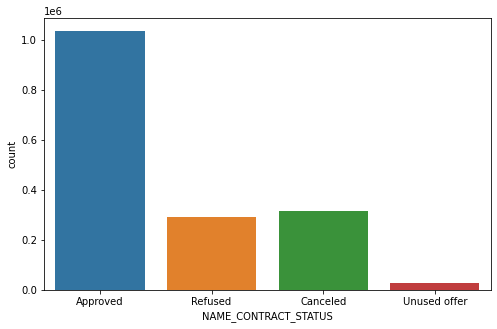

In [105]:
overalldata(data,"NAME_CONTRACT_STATUS")

Mostly application approved and Canceled, Refused offer are similar

__Let's divide dataset into 4 categories so to analyse each effect.__

In [106]:
dataA = data.loc[data["NAME_CONTRACT_STATUS"]=="Approved"]
dataA.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0


In [107]:
dataC = data.loc[data["NAME_CONTRACT_STATUS"]=="Canceled"]
dataC.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
24,1555330,199353,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,6,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
dataR = data.loc[data["NAME_CONTRACT_STATUS"]=="Refused"]
dataR.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,NaN,45000.0,SATURDAY,16,...,XNA,18.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
20,1506815,166490,Cash loans,25454.025,450000.0,491580.0,NaN,450000.0,MONDAY,6,...,XNA,24.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
23,1172937,302212,Cash loans,39475.305,1129500.0,1277104.5,NaN,1129500.0,THURSDAY,5,...,XNA,54.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
dataU = data.loc[data["NAME_CONTRACT_STATUS"]=="Unused offer"]
dataU.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
41,1366380,247572,Consumer loans,NaN,17950.5,17950.5,0.0,17950.5,MONDAY,19,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
97,1935914,191576,Consumer loans,NaN,23400.0,23400.0,NaN,23400.0,SATURDAY,9,...,Consumer electronics,NaN,XNA,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
98,1457539,307992,Consumer loans,NaN,113215.5,113215.5,0.0,113215.5,SUNDAY,12,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
152,1763186,393157,Consumer loans,NaN,62860.5,62860.5,0.0,62860.5,FRIDAY,15,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
182,2284847,454600,Consumer loans,NaN,27666.0,27666.0,0.0,27666.0,THURSDAY,16,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN


## NAME_CONTRACT_TYPE

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64


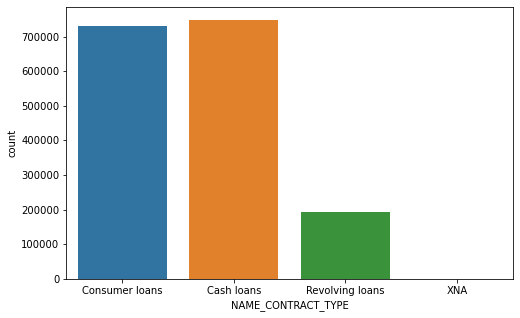

In [110]:
overalldata(data,"NAME_CONTRACT_TYPE")

The occurence of consumer loans and cash loan are similar whereas Revolving loans are less compare to others.

- __APPROVED__

Consumer loans     626470
Cash loans         312540
Revolving loans     97771
Name: NAME_CONTRACT_TYPE, dtype: int64


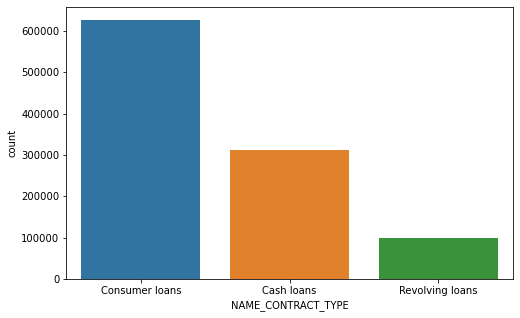

In [111]:
overalldata(dataA,"NAME_CONTRACT_TYPE")

- There are total 747553 client with Cash loan out of which 312540 around __41.81%__ are approved.
- There are total 729151 client with Consumer loan out of which 626470 around __85.92%__ are approved.
- There are total 193164 client with Revolving loan out of which 97771 around __50.61%__ are approved.

For consumer loan Approval is most.

- __CANCELED__

Cash loans         268591
Revolving loans     45854
Consumer loans       1559
XNA                   315
Name: NAME_CONTRACT_TYPE, dtype: int64


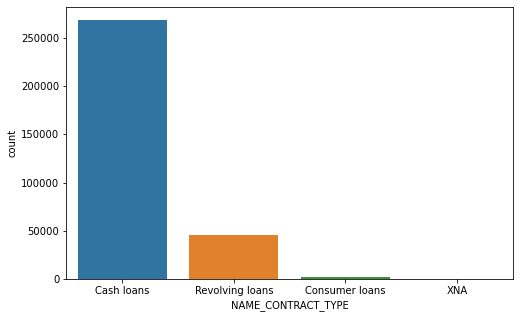

In [112]:
overalldata(dataC,"NAME_CONTRACT_TYPE")

- There are total 747553 client with Cash loan out of which 268591 around __35.93%__ are Canceled.
- There are total 729151 client with Consumer loan out of which 45854 around __6.29%__ are Canceled.
- There are total 193164 client with Revolving loan out of which 1559 around __0.81%__ are Canceled.

For Cash loan Cancellation is most.

- __REFUSED__

Cash loans         165928
Consumer loans      75185
Revolving loans     49534
XNA                    31
Name: NAME_CONTRACT_TYPE, dtype: int64


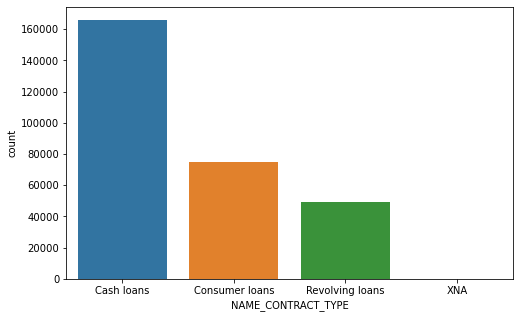

In [113]:
overalldata(dataR,"NAME_CONTRACT_TYPE")

- There are total 747553 client with Cash loan out of which 165928 around __22.20%__ are Refused.
- There are total 747553 client with Consumer loan out of which 75185 around __10.06%__ are Refused.
- There are total 747553 client with Revolving loan out of which 49534 around __6.63%__ are Refused.

For Cash loan Refuse is most.

- __UNUSED OFFER__

Consumer loans     25937
Cash loans           494
Revolving loans        5
Name: NAME_CONTRACT_TYPE, dtype: int64


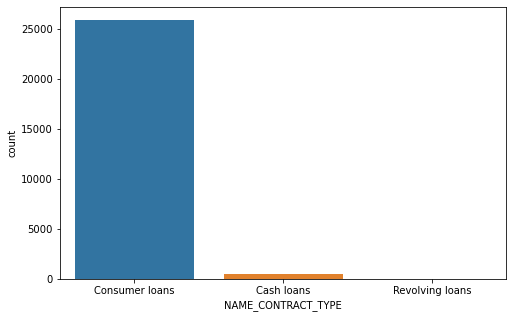

In [114]:
overalldata(dataU,"NAME_CONTRACT_TYPE")

- There are total 747553 client with Cash loan out of which 494 around __0.067%__ are Unused Offer.
- There are total 747553 client with Consumer loan out of which 25937 around __3.47%__ are Unused Offer.
- There are negligible unused offers for revolving loan.

For Consumer loan Unused offer is most.

## WEEKDAY_APPR_PROCESS_START

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


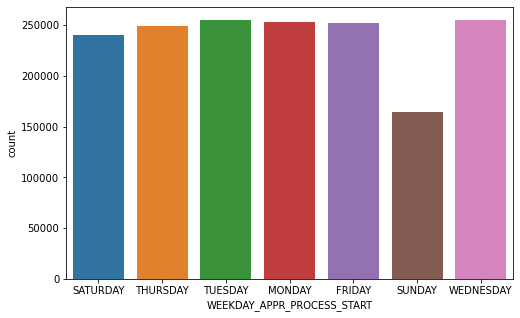

In [115]:
overalldata(data,"WEEKDAY_APPR_PROCESS_START")

Generally on the week day client apply for previous application as compare to weekend.

## FLAG_LAST_APPL_PER_CONTRACT

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64


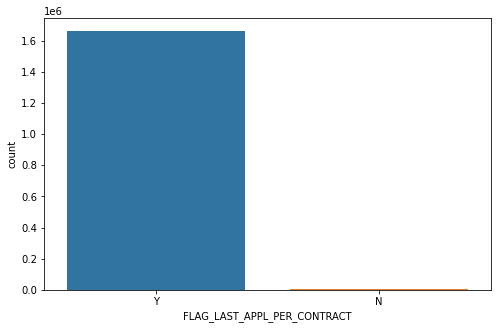

In [116]:
overalldata(data,"FLAG_LAST_APPL_PER_CONTRACT")

Mostly there is no mistake for more than application.

## NFLAG_LAST_APPL_IN_DAY

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64


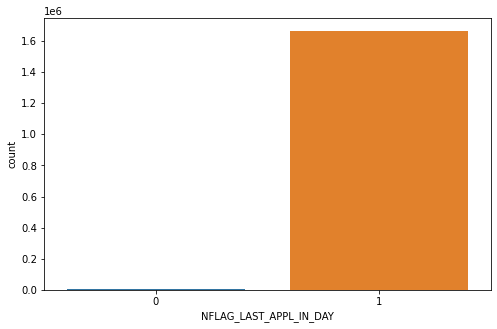

In [117]:
overalldata(data,"NFLAG_LAST_APPL_IN_DAY")

Mostly it is one application for client per day.

# NAME_PORTFOLIO

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64


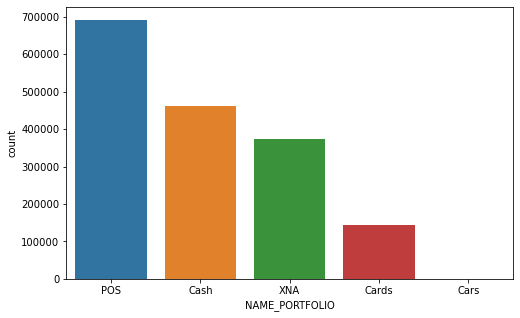

In [118]:
overalldata(data,"NAME_PORTFOLIO")

# approved

POS      626207
Cash     312536
Cards     97771
Cars        263
XNA           4
Name: NAME_PORTFOLIO, dtype: int64


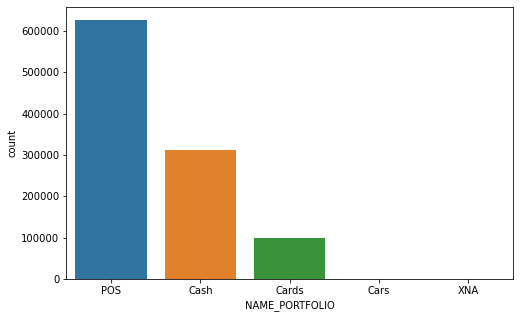

In [119]:
overalldata(dataA,"NAME_PORTFOLIO")

- There are total 691011 pos out of which 626207 approved
- There are total 461563 cash out of which 312536 approved
- There are total 372230 Xna out of which 4 approved
- There are total 144985 cards out of which 97771 approved
- There are total 425 cars out of which 263 approved

# Refused

Cash     139204
POS       63720
Cards     46739
XNA       40897
Cars        118
Name: NAME_PORTFOLIO, dtype: int64


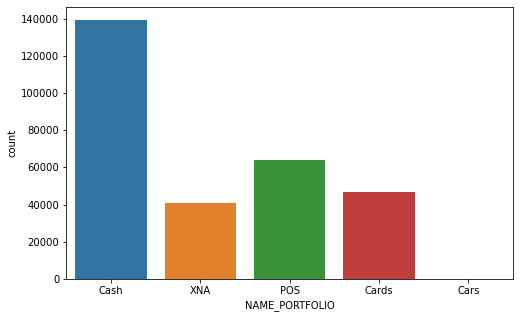

In [120]:
overalldata(dataR,"NAME_PORTFOLIO")

- There are total 691011 pos out of which 63720 refused
- There are total 461563 cash out of which 139204 refused
- There are total 372230 Xna out of which 40897 refused
- There are total 144985 cards out of which 46739 refused
- There are total 425 cars out of which 118 refused

# Unused Name Portfolio

XNA      25524
POS        910
Cards        2
Name: NAME_PORTFOLIO, dtype: int64


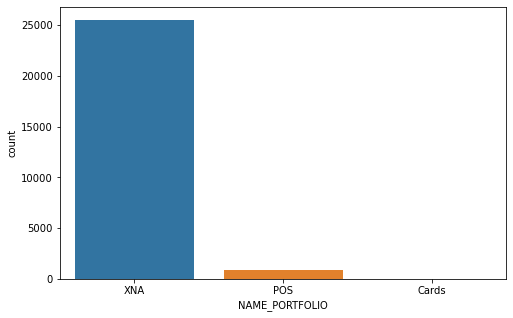

In [121]:
overalldata(dataU,"NAME_PORTFOLIO")

- There are total 691011 pos out of which 910 refused
- There are total 461563 cash out of which 139204 refused
- There are total 372230 Xna out of which 0 refused
- There are total 144985 cards out of which 2 refused
- There are total 425 cars out of which 0 refused

# Canceled name portforlio

XNA      305805
Cash       9823
Cards       473
POS         174
Cars         44
Name: NAME_PORTFOLIO, dtype: int64


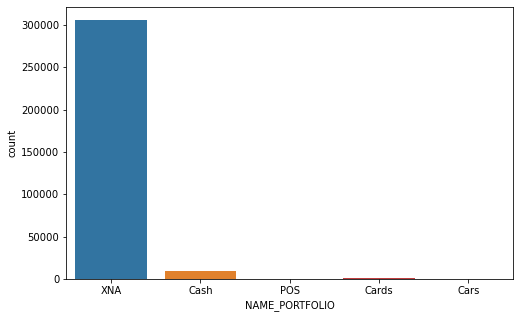

In [122]:
overalldata(dataC,"NAME_PORTFOLIO")

- There are total 691011 pos out of which 174 canceled
- There are total 461563 cash out of which 9823 canceled
- There are total 372230 Xna out of which 305805 canceled
- There are total 144985 cards out of which 473 canceled
- There are total 425 cars out of which 44 canceled

# NAME_PRODUCT_TYPE

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64


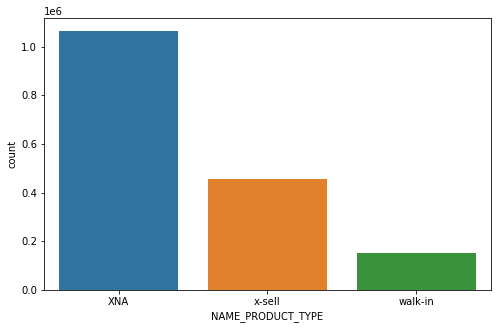

In [123]:
overalldata(data,"NAME_PRODUCT_TYPE")

- there are lots of XNA  and the walk ins are very less

- approved

XNA        626474
x-sell     337649
walk-in     72658
Name: NAME_PRODUCT_TYPE, dtype: int64


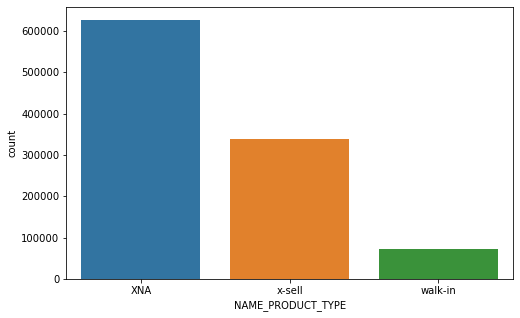

In [124]:
overalldata(dataA,"NAME_PRODUCT_TYPE")

- There are total 1063666 XNA out of which 626474 approved
- There are total 456287 x-sell out of which 337649 approved
- There are total 150261 walk-in out of which 72658 approved


- Refused

x-sell     110201
XNA        104735
walk-in     75742
Name: NAME_PRODUCT_TYPE, dtype: int64


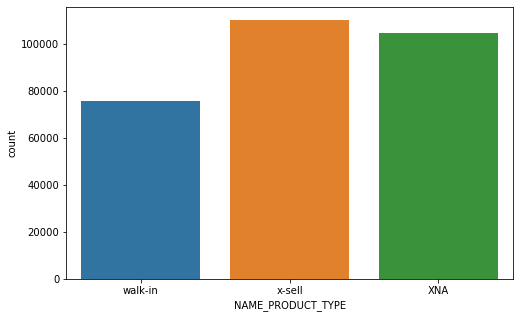

In [125]:
overalldata(dataR,"NAME_PRODUCT_TYPE")

- There are total 1063666 XNA out of which 104735 refused
- There are total 456287 x-sell out of which 110201 refused
- There are total 150261 walk-in out of which 75742 refused


- canceled

XNA        306023
x-sell       8435
walk-in      1861
Name: NAME_PRODUCT_TYPE, dtype: int64


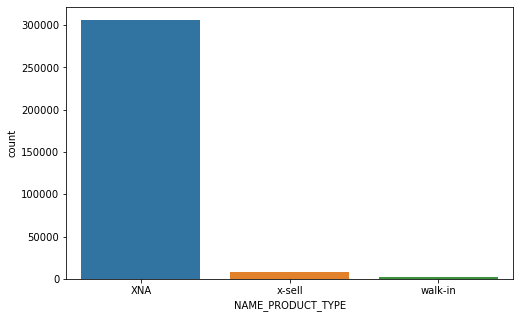

In [126]:
overalldata(dataC,"NAME_PRODUCT_TYPE")

- There are total 1063666 XNA out of which 306023 cancled
- There are total 456287 x-sell out of which 8435 canceled
- There are total 150261 walk-in out of which 1861 canceld


- unused

XNA       26434
x-sell        2
Name: NAME_PRODUCT_TYPE, dtype: int64


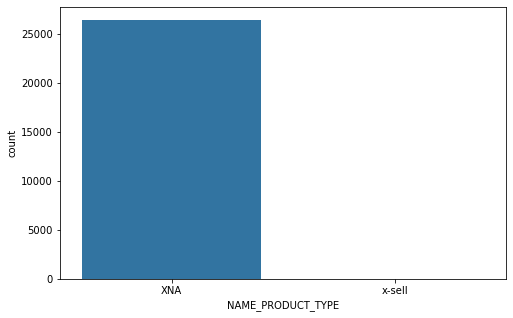

In [127]:
overalldata(dataU,"NAME_PRODUCT_TYPE")

- There are total 1063666 XNA out of which 26434 cancled
- There are total 456287 x-sell out of which 2 canceled
- There are total 150261 walk-in out of which 0 canceld



# CHANNEL_TYPE

- overall 

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64


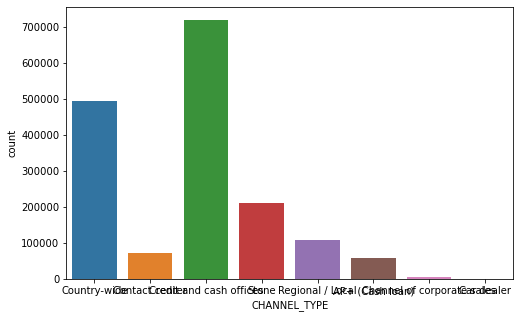

In [128]:
overalldata(data,"CHANNEL_TYPE")

- Approved

Country-wide                  402787
Credit and cash offices       289056
Stone                         189135
Regional / Local               96417
AP+ (Cash loan)                31231
Contact center                 25220
Channel of corporate sales      2649
Car dealer                       286
Name: CHANNEL_TYPE, dtype: int64


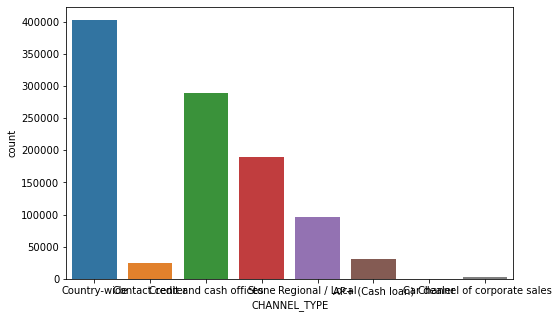

In [129]:
overalldata(dataA,"CHANNEL_TYPE")

- There are total 719968 Credit and cash offices out of which 289056 Approved
- There are total  494690 Country-wide    out of which 402787 Approved
- There are total 212083 Stone out of which 189135 Approved
- There are total 108528 Regional / Local out of which 96417 Approved
- There are total 71297 Contact center out of which 25220 Approved

- There are total  57046 AP+ (Cash loan)    out of which 31231 Approved
- There are total 6150 Channel of corporate sales out of which 2649 Approved
- There are total 452 Car dealer out of which 286 Approved

 


- Refused

Credit and cash offices       150450
Country-wide                   65762
AP+ (Cash loan)                22099
Stone                          21988
Contact center                 15566
Regional / Local               11326
Channel of corporate sales      3365
Car dealer                       122
Name: CHANNEL_TYPE, dtype: int64


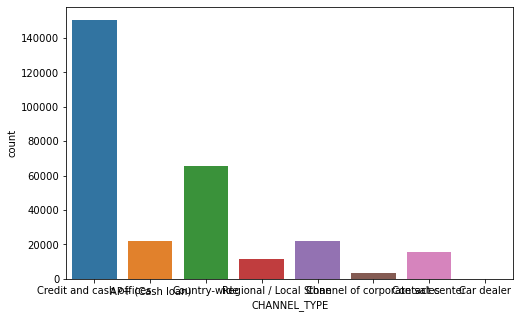

In [130]:
overalldata(dataR,"CHANNEL_TYPE")

- There are total 719968 Credit and cash offices out of which 150450 Refused
- There are total  494690 Country-wide    out of which 65762 Refused
- There are total 212083 Stone out of which 21988 Refused
- There are total 108528 Regional / Local out of which 11326 Refused
- There are total 71297 Contact center out of which 15566 Refused

- There are total  57046 AP+ (Cash loan)    out of which 22099 Refused
- There are total 6150 Channel of corporate sales out of which 3365 Refused
- There are total 452 Car dealer out of which 122 Refused

- Canceled

Credit and cash offices       279973
Contact center                 30511
AP+ (Cash loan)                 3711
Country-wide                    1782
Channel of corporate sales       136
Regional / Local                  95
Stone                             67
Car dealer                        44
Name: CHANNEL_TYPE, dtype: int64


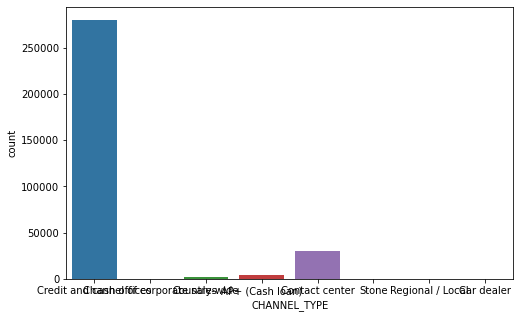

In [131]:
overalldata(dataC,"CHANNEL_TYPE")

- There are total 719968 Credit and cash offices out of which 279973 canceled
- There are total  494690 Country-wide    out of which 1782 canceled
- There are total 212083 Stone out of which 67 canceled
- There are total 108528 Regional / Local out of which 95 canceled
- There are total 71297 Contact center out of which 30511 canceled

- There are total  57046 AP+ (Cash loan)    out of which 3711 canceled
- There are total 6150 Channel of corporate sales out of which 136 canceled
- There are total 452 Car dealer out of which 44 canceled

- Unused

Country-wide               24359
Stone                        893
Regional / Local             690
Credit and cash offices      489
AP+ (Cash loan)                5
Name: CHANNEL_TYPE, dtype: int64


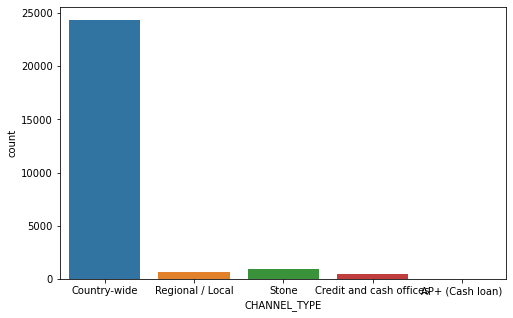

In [132]:
overalldata(dataU,"CHANNEL_TYPE")

- There are total 719968 Credit and cash offices out of which 489 canceled
- There are total  494690 Country-wide    out of which 24359 canceled
- There are total 212083 Stone out of which 893 canceled
- There are total 108528 Regional / Local out of which 690 canceled
- There are total 71297 Contact center out of which 0 canceled

- There are total  57046 AP+ (Cash loan)    out of which 5 canceled
- There are total 6150 Channel of corporate sales out of which 0 canceled
- There are total 452 Car dealer out of which 0 canceled

# NAME_SELLER_INDUSTRY

- overall data

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64


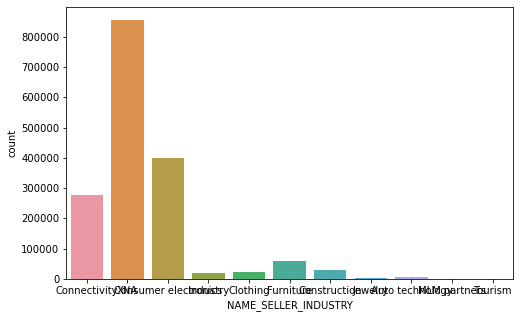

In [133]:
overalldata(data,"NAME_SELLER_INDUSTRY")

- approved

XNA                     349962
Consumer electronics    345194
Connectivity            216284
Furniture                51706
Construction             26618
Clothing                 21611
Industry                 17177
Auto technology           4515
Jewelry                   2465
MLM partners               797
Tourism                    452
Name: NAME_SELLER_INDUSTRY, dtype: int64


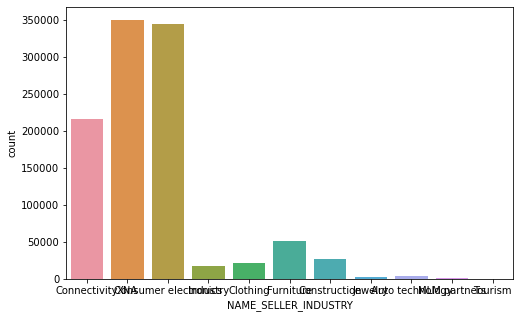

In [134]:
overalldata(dataA,"NAME_SELLER_INDUSTRY")

- There are total 855720 XNA out of which 349962 approved
- There are total  398265 Consumer electronics    out of which 345194 approved
- There are total 276029 Connectivity out of which 216284 approved
- There are total 29781 Construction out of which 26618 approved
- There are total 23949 Clothing out of which 21611 approved
- There are total 57849 furniture out of which 51706 approved
- There are total  57046 Industry   out of which 19194 approved
- There are total 19194 Auto technology out of which 4515 approved
- There are total 2709 Jewelry out of which 2465 approved
- There are total 1215 MLM partners out of which 797 approved
- There are total 513 Tourism out of which 452  approved

- rejected

XNA                     191389
Consumer electronics     49510
Connectivity             35902
Furniture                 5646
Construction              3076
Clothing                  2265
Industry                  1910
Auto technology            468
Jewelry                    243
MLM partners               208
Tourism                     61
Name: NAME_SELLER_INDUSTRY, dtype: int64


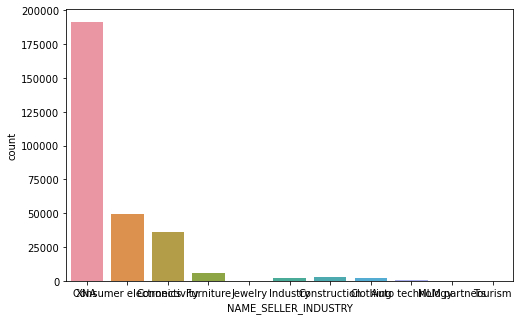

In [135]:
overalldata(dataR,"NAME_SELLER_INDUSTRY")

- There are total 855720 XNA out of which 191389 rejected
- There are total  398265 Consumer electronics    out of which 49510 rejected
- There are total 276029 Connectivity out of which 35902 rejected
- There are total 29781 Construction out of which 3076 rejected
- There are total 23949 Clothing out of which 2265 rejected
- There are total 57849 furniture out of which 5646 rejected
- There are total  57046 Industry   out of which 1910 rejected
- There are total 19194 Auto technology out of which 468 rejected
- There are total 2709 Jewelry out of which 243 rejected
- There are total 1215 MLM partners out of which 208 rejected
- There are total 513 Tourism out of which 61  rejected

- canceled

XNA                     313861
Connectivity              1650
Furniture                  286
Consumer electronics       248
MLM partners               209
Industry                    50
Construction                11
Auto technology              2
Clothing                     1
Jewelry                      1
Name: NAME_SELLER_INDUSTRY, dtype: int64


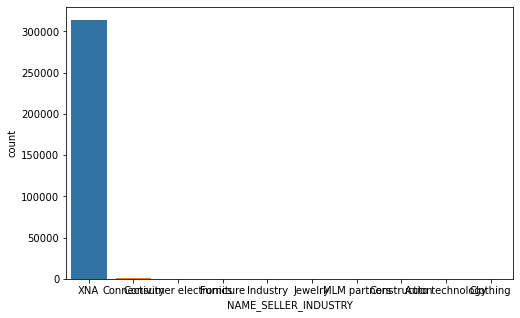

In [136]:
overalldata(dataC,"NAME_SELLER_INDUSTRY")

- There are total 855720 XNA out of which 313861 canceled
- There are total  398265 Consumer electronics    out of which 248 canceled
- There are total 276029 Connectivity out of which 1650 canceled
- There are total 29781 Construction out of which 11 canceled
- There are total 23949 Clothing out of which 1 canceled
- There are total 57849 furniture out of which 286 canceled
- There are total  57046 Industry   out of which 50 canceled
- There are total 19194 Auto technology out of which 2 canceled
- There are total 2709 Jewelry out of which 243 canceled
- There are total 1215 MLM partners out of which 209 canceled
- There are total 513 Tourism out of which 1  canceled

- Unused

Connectivity            22193
Consumer electronics     3313
XNA                       508
Furniture                 211
Construction               76
Clothing                   72
Industry                   57
Auto technology             5
MLM partners                1
Name: NAME_SELLER_INDUSTRY, dtype: int64


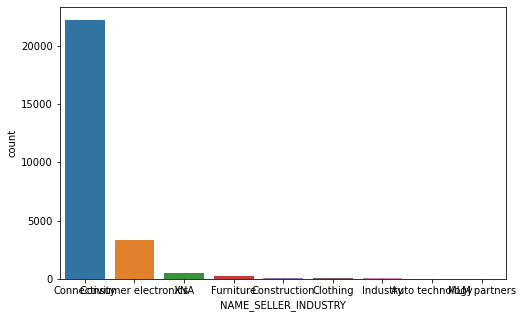

In [137]:
overalldata(dataU,"NAME_SELLER_INDUSTRY")

- There are total 855720 XNA out of which 508 unused
- There are total  398265 Consumer electronics    out of which 3313 unused
- There are total 276029 Connectivity out of which 22193 unused
- There are total 29781 Construction out of which 76 unused
- There are total 23949 Clothing out of which 72 unused
- There are total 57849 furniture out of which 211 unused
- There are total  57046 Industry   out of which 57 unused
- There are total 19194 Auto technology out of which 5 unused
- There are total 2709 Jewelry out of which 243 unused
- There are total 1215 MLM partners out of which 1 unused
- There are total 513 Tourism out of which 0  unused